In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [3]:
dfd = pd.read_csv("Demographic data.csv")
dfc = pd.read_csv("Credit Bureau data.csv")

In [4]:
print(dfd.shape)
print(dfd.info())
dfd.head()

(71295, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [5]:
print(dfc.shape)
print(dfc.info())
dfc.head()

(71295, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null i

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [6]:
dfc.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [7]:
dfd.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [8]:
df_credX =pd.merge(dfd,dfc,how='inner',on='Application ID')
woe_data=df_credX.copy()

In [9]:
woe_data.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [10]:
pd.set_option('display.max_columns', None)
print(df_credX.shape)
print(df_credX.info())
df_credX.head()

(71301, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71301 entries, 0 to 71300
Data columns (total 30 columns):
Application ID                                                     71301 non-null int64
Age                                                                71301 non-null int64
Gender                                                             71299 non-null object
Marital Status (at the time of application)                        71295 non-null object
No of dependents                                                   71298 non-null float64
Income                                                             71301 non-null float64
Education                                                          71182 non-null object
Profession                                                         71287 non-null object
Type of residence                                                  71293 non-null object
No of months in current residence                                  71301 non-n

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [11]:
# percentage of null values in the given data

pd.DataFrame((df_credX.isnull().sum()/len(df_credX.index))*100)

,0
Application ID,0.000000
Age,0.000000
Gender,0.002805
Marital Status (at the time of application),0.008415
No of dependents,0.004208
Income,0.000000
Education,0.166898
Profession,0.019635
Type of residence,0.011220
No of months in current residence,0.000000


In [12]:
#df_credX=df_credX.drop((pd.Series(df_credX.columns)[[0,4,5,7,24,6,13,14,3,15,21,20,17,26,16]]), axis=1)

In [13]:
# Checking for the duplicated rows

df_credX.duplicated().sum()

0

In [14]:
# seperating the data that has NAN in performane tag and assuming it as rejected population
df_rejected=df_credX[df_credX['Performance Tag_x'].isnull()]
print(df_rejected.shape)
df_rejected.head()

(1425, 30)


,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
69609,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,18,NaN,0,0,2,1,2,3,30.0,4.0,12,3,7,2,4,0.0,1309623.0,13,0,NaN
69610,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,25,NaN,1,1,1,3,2,2,16.0,3.0,7,3,4,3,5,0.0,775626.0,7,0,NaN
69611,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,31,NaN,3,4,5,3,5,6,83.0,2.0,7,2,4,0,3,0.0,732602.0,8,0,NaN
69612,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,47,NaN,1,3,4,3,4,5,87.0,2.0,7,1,4,4,5,0.0,842057.0,8,0,NaN
69613,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,49,NaN,2,2,4,3,2,6,42.0,3.0,7,2,3,3,6,0.0,786997.0,7,1,NaN


In [15]:
df_credX=df_credX[~(df_credX['Performance Tag_x'].isnull())]
print(df_credX.shape)
df_credX.head()

(69876, 30)


,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [16]:
df_credX.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                2
Marital Status (at the time of application)                           6
No of dependents                                                      3
Income                                                                0
Education                                                           118
Profession                                                           13
Type of residence                                                     8
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag_x                                                     0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                    

In [17]:
df_credX['Performance_Tag']=df_credX['Performance Tag_x']
df_credX.drop(['Performance Tag_x','Performance Tag_y'], axis=1,inplace=True)

In [18]:
df_credX=df_credX[~df_credX["Avgas CC Utilization in last 12 months"].isnull()]
df_credX=df_credX[~df_credX["Education"].isnull()]
df_credX=df_credX[~df_credX["Profession "].isnull()]
df_credX=df_credX[~df_credX["Gender"].isnull()]
df_credX=df_credX[~df_credX["Marital Status (at the time of application)"].isnull()]
df_credX=df_credX[~df_credX["No of dependents"].isnull()]
df_credX=df_credX[~df_credX["Type of residence"].isnull()]


print(df_credX.shape)
df_credX.isnull().sum()


(68705, 29)


Application ID                                                     0
Age                                                                0
Gender                                                             0
Marital Status (at the time of application)                        0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in las

#### EDA

In [19]:
df_credX['Performance_Tag'].value_counts()

0.0    65809
1.0     2896
Name: Performance_Tag, dtype: int64

In [20]:
# percentage of defaulters

100*(df_credX['Performance_Tag'].sum()/df_credX['Performance_Tag'].count()).round(4)

4.22

#### Age

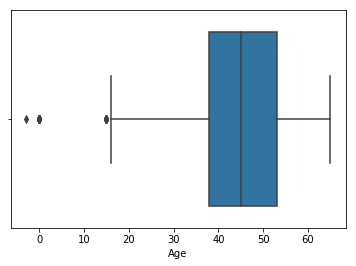

In [21]:
sns.boxplot(x='Age', data=df_credX)
plt.show()

In [22]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,df_credX['Age'].max() + 10, 10)
df_credX['age_bins'] = pd.cut(df_credX['Age'], bins, include_lowest=True)

In [23]:
No_of_customers = df_credX.groupby('age_bins')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('age_bins')['Performance_Tag'].count().reset_index(name = 'count_defaulters')

In [24]:
agg_age = No_of_customers.merge(count_defaulters, on='age_bins')

In [25]:
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)

In [26]:
agg_age

,age_bins,No_of_customers,count_defaulters,default_rate
0,"(9.999, 20.0]",115,3,2.6
1,"(20.0, 30.0]",5683,233,4.1
2,"(30.0, 40.0]",18375,821,4.5
3,"(40.0, 50.0]",22490,936,4.2
4,"(50.0, 60.0]",17255,707,4.1
5,"(60.0, 70.0]",4770,196,4.1


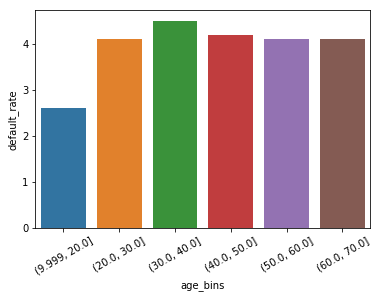

In [27]:
ax = sns.barplot(x='age_bins', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Gender

In [28]:
No_of_customers = df_credX.groupby('Gender')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('Gender')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='Gender')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,Gender,No_of_customers,count_defaulters,default_rate
0,F,16233,703,4.3
1,M,52472,2193,4.2


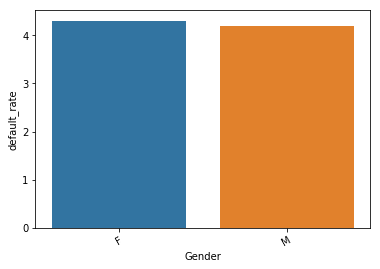

In [29]:
ax = sns.barplot(x='Gender', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Marital Status

In [30]:
No_of_customers = df_credX.groupby('Marital Status (at the time of application)')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('Marital Status (at the time of application)')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='Marital Status (at the time of application)')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,Marital Status (at the time of application),No_of_customers,count_defaulters,default_rate
0,Married,58541,2458,4.2
1,Single,10164,438,4.3


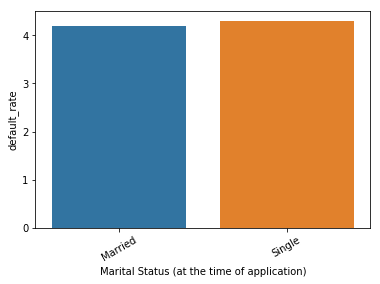

In [31]:
ax = sns.barplot(x='Marital Status (at the time of application)', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Profession

In [32]:
No_of_customers = df_credX.groupby('Profession ')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('Profession ')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='Profession ')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,Profession,No_of_customers,count_defaulters,default_rate
0,SAL,39034,1603,4.1
1,SE,13701,630,4.6
2,SE_PROF,15970,663,4.2


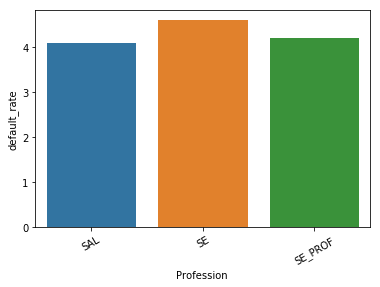

In [33]:
ax = sns.barplot(x='Profession ', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Education

In [34]:
No_of_customers = df_credX.groupby('Education')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('Education')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='Education')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,Education,No_of_customers,count_defaulters,default_rate
0,Bachelor,17031,732,4.3
1,Masters,23127,974,4.2
2,Others,114,8,7.0
3,Phd,4401,184,4.2
4,Professional,24032,998,4.2


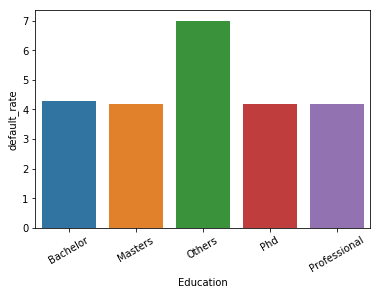

In [35]:
ax = sns.barplot(x='Education', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Type of residence

In [36]:
No_of_customers = df_credX.groupby('Type of residence')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('Type of residence')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='Type of residence')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,Type of residence,No_of_customers,count_defaulters,default_rate
0,Company provided,1580,71,4.5
1,Living with Parents,1746,79,4.5
2,Others,195,5,2.6
3,Owned,13778,579,4.2
4,Rented,51406,2162,4.2


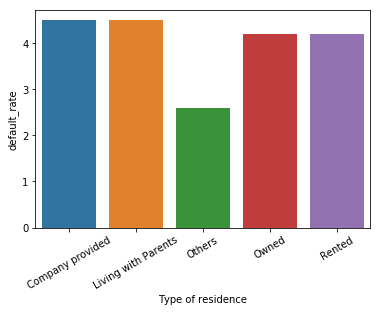

In [37]:
ax = sns.barplot(x='Type of residence', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Income

In [38]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(1,df_credX['Income'].max() + 10, 10)
df_credX['income_bins'] = pd.cut(df_credX['Income'], bins, include_lowest=True)

In [39]:
No_of_customers = df_credX.groupby('income_bins')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('income_bins')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='income_bins')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,income_bins,No_of_customers,count_defaulters,default_rate
0,"(0.999, 11.0]",13817,747,5.4
1,"(11.0, 21.0]",13214,610,4.6
2,"(21.0, 31.0]",13425,588,4.4
3,"(31.0, 41.0]",13334,464,3.5
4,"(41.0, 51.0]",9895,344,3.5
5,"(51.0, 61.0]",4916,141,2.9


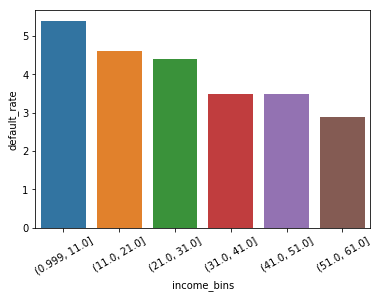

In [40]:
ax = sns.barplot(x='income_bins', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### No of dependents

In [41]:
No_of_customers = df_credX.groupby('No of dependents')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('No of dependents')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='No of dependents')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,No of dependents,No_of_customers,count_defaulters,default_rate
0,1.0,14962,660,4.4
1,2.0,14894,576,3.9
2,3.0,15376,681,4.4
3,4.0,11808,484,4.1
4,5.0,11665,495,4.2


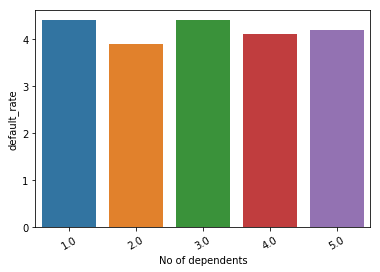

In [42]:
ax = sns.barplot(x='No of dependents', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Presence of open home loan

In [43]:
No_of_customers = df_credX.groupby('Presence of open home loan')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('Presence of open home loan')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='Presence of open home loan')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,Presence of open home loan,No_of_customers,count_defaulters,default_rate
0,0.0,50676,2291,4.5
1,1.0,18029,605,3.4


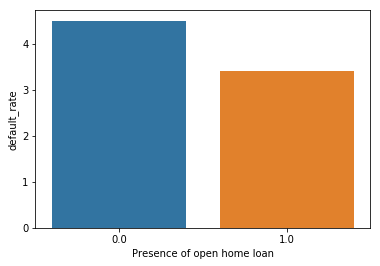

In [44]:
ax = sns.barplot(x='Presence of open home loan', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Presence of open auto loan

In [45]:
No_of_customers = df_credX.groupby('Presence of open auto loan')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('Presence of open auto loan')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='Presence of open auto loan')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,Presence of open auto loan,No_of_customers,count_defaulters,default_rate
0,0,62789,2677,4.3
1,1,5916,219,3.7


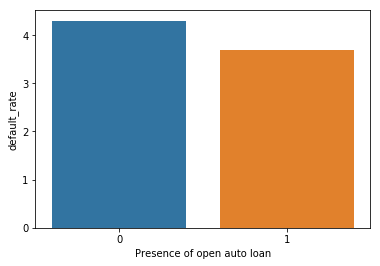

In [46]:
ax = sns.barplot(x='Presence of open auto loan', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Total No of Trades

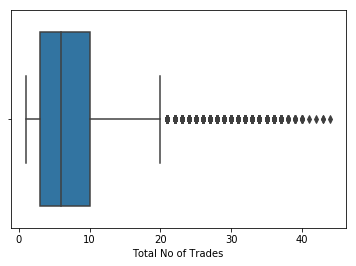

In [47]:
sns.boxplot(x='Total No of Trades', data=df_credX)
plt.show()

In [48]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(0.1,df_credX['Total No of Trades'].max() + 5, 5)
df_credX['trade_bins'] = pd.cut(df_credX['Total No of Trades'], bins, include_lowest=True)

In [49]:
No_of_customers = df_credX.groupby('trade_bins')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('trade_bins')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='trade_bins')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,trade_bins,No_of_customers,count_defaulters,default_rate
0,"(0.099, 5.1]",31434,769,2.4
1,"(5.1, 10.1]",21400,1301,6.1
2,"(10.1, 15.1]",6643,473,7.1
3,"(15.1, 20.1]",2416,84,3.5
4,"(20.1, 25.1]",3459,130,3.8
5,"(25.1, 30.1]",2453,102,4.2
6,"(30.1, 35.1]",792,35,4.4
7,"(35.1, 40.1]",103,2,1.9
8,"(40.1, 45.1]",5,0,0.0


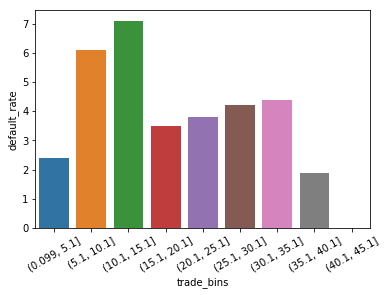

In [50]:
ax = sns.barplot(x='trade_bins', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### Avgas CC Utilization in last 12 months

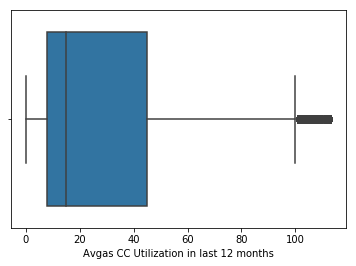

In [51]:
sns.boxplot(x='Avgas CC Utilization in last 12 months', data=df_credX)
plt.show()

In [52]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(0.1,df_credX['Avgas CC Utilization in last 12 months'].max() + 10, 10)
df_credX['avgCCUtil_bins'] = pd.cut(df_credX['Avgas CC Utilization in last 12 months'], bins, include_lowest=True)

In [53]:
No_of_customers = df_credX.groupby('avgCCUtil_bins')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('avgCCUtil_bins')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='avgCCUtil_bins')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,avgCCUtil_bins,No_of_customers,count_defaulters,default_rate
0,"(0.099, 10.1]",24284,468,1.9
1,"(10.1, 20.1]",15646,500,3.2
2,"(20.1, 30.1]",4936,301,6.1
3,"(30.1, 40.1]",4217,286,6.8
4,"(40.1, 50.1]",4900,378,7.7
5,"(50.1, 60.1]",4116,285,6.9
6,"(60.1, 70.1]",3099,226,7.3
7,"(70.1, 80.1]",2018,158,7.8
8,"(80.1, 90.1]",1113,76,6.8
9,"(90.1, 100.1]",533,31,5.8


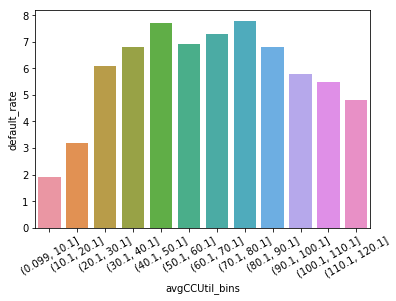

In [54]:
ax = sns.barplot(x='avgCCUtil_bins', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### No of months in current residence

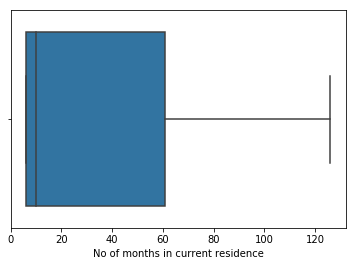

In [55]:
sns.boxplot(x='No of months in current residence', data=df_credX)
plt.show()

In [56]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(1,df_credX['No of months in current residence'].max() + 15, 10)
df_credX['freq_Cur_residence_bins'] = pd.cut(df_credX['No of months in current residence'], bins, include_lowest=True)

In [57]:
No_of_customers = df_credX.groupby('freq_Cur_residence_bins')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('freq_Cur_residence_bins')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='freq_Cur_residence_bins')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,freq_Cur_residence_bins,No_of_customers,count_defaulters,default_rate
0,"(0.999, 11.0]",34817,1160,3.3
1,"(11.0, 21.0]",3691,247,6.7
2,"(21.0, 31.0]",3444,227,6.6
3,"(31.0, 41.0]",3451,192,5.6
4,"(41.0, 51.0]",3260,172,5.3
5,"(51.0, 61.0]",3097,165,5.3
6,"(61.0, 71.0]",2841,125,4.4
7,"(71.0, 81.0]",2786,139,5.0
8,"(81.0, 91.0]",2712,129,4.8
9,"(91.0, 101.0]",2723,105,3.9


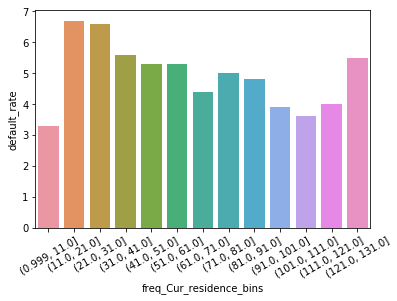

In [58]:
ax = sns.barplot(x='freq_Cur_residence_bins', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

#### No of months in current company

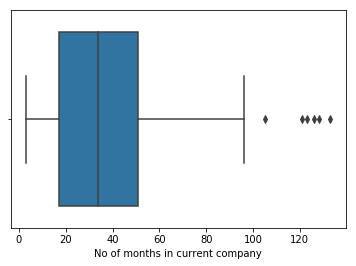

In [59]:
sns.boxplot(x='No of months in current company', data=df_credX)
plt.show()

In [60]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(1,df_credX['No of months in current company'].max() + 5, 10)
df_credX['freq_curr_comp_bins'] = pd.cut(df_credX['No of months in current company'], bins, include_lowest=True)

In [61]:
No_of_customers = df_credX.groupby('freq_curr_comp_bins')['Performance_Tag'].count().reset_index(name = 'No_of_customers')
count_defaulters = df_credX[df_credX['Performance_Tag']==1].groupby('freq_curr_comp_bins')['Performance_Tag'].count().reset_index(name = 'count_defaulters')
agg_age = No_of_customers.merge(count_defaulters, on='freq_curr_comp_bins')
agg_age['default_rate'] = 100*(agg_age['count_defaulters']/agg_age['No_of_customers']).round(3)
agg_age

,freq_curr_comp_bins,No_of_customers,count_defaulters,default_rate
0,"(0.999, 11.0]",12192,591,4.8
1,"(11.0, 21.0]",9713,496,5.1
2,"(21.0, 31.0]",9959,386,3.9
3,"(31.0, 41.0]",10076,427,4.2
4,"(41.0, 51.0]",10083,372,3.7
5,"(51.0, 61.0]",9704,311,3.2
6,"(61.0, 71.0]",5193,230,4.4
7,"(71.0, 81.0]",1776,83,4.7
8,"(81.0, 91.0]",2,0,0.0
9,"(91.0, 101.0]",1,0,0.0


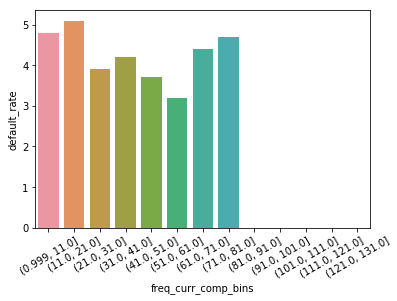

In [62]:
ax = sns.barplot(x='freq_curr_comp_bins', y='default_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

In [63]:
df_credX.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance_Tag,age_bins,income_bins,trade_bins,avgCCUtil_bins,freq_Cur_residence_bins,freq_curr_comp_bins
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0,"(40.0, 50.0]","(31.0, 41.0]","(0.099, 5.1]","(0.099, 10.1]","(111.0, 121.0]","(51.0, 61.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0,"(30.0, 40.0]","(51.0, 61.0]","(0.099, 5.1]","(0.099, 10.1]","(111.0, 121.0]","(41.0, 51.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0,"(30.0, 40.0]","(41.0, 51.0]","(0.099, 5.1]","(0.099, 10.1]","(101.0, 111.0]","(41.0, 51.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0,"(40.0, 50.0]","(51.0, 61.0]","(0.099, 5.1]","(10.1, 20.1]","(91.0, 101.0]","(51.0, 61.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0,"(30.0, 40.0]","(41.0, 51.0]","(0.099, 5.1]","(10.1, 20.1]","(111.0, 121.0]","(41.0, 51.0]"


In [64]:
woe_data.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [65]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [66]:
iv, woe=iv_woe(woe_data,'Performance Tag_y',bins=10,show_woe = True)

Information value of Application ID is 0.001533
         Variable                       Cutoff     N  Events  % of Events  \
0  Application ID     (100449.999, 99217395.0]  6963   290.0     0.098338   
1  Application ID    (99217395.0, 199057425.0]  6984   277.0     0.093930   
2  Application ID   (199057425.0, 298444106.0]  7005   306.0     0.103764   
3  Application ID   (298444106.0, 399368832.0]  6994   295.0     0.100034   
4  Application ID   (399368832.0, 497597712.0]  6963   312.0     0.105799   
5  Application ID   (497597712.0, 598672970.0]  6985   281.0     0.095287   
6  Application ID   (598672970.0, 699599317.0]  6995   296.0     0.100373   
7  Application ID   (699599317.0, 798790318.0]  7001   307.0     0.104103   
8  Application ID   (798790318.0, 899464138.0]  6996   285.0     0.096643   
9  Application ID  (899464138.0, 1000084142.0]  6990   300.0     0.101729   

   Non-Events  % of Non-Events       WoE            IV  
0      6673.0         0.099706 -0.013808  1.887

                                       Variable  Cutoff      N  Events  \
0  No of times 60 DPD or worse in last 6 months       0  51874  1582.0   
1  No of times 60 DPD or worse in last 6 months       1  11134   785.0   
2  No of times 60 DPD or worse in last 6 months       2   4918   389.0   
3  No of times 60 DPD or worse in last 6 months       3   1469   148.0   
4  No of times 60 DPD or worse in last 6 months       4    411    39.0   
5  No of times 60 DPD or worse in last 6 months       5     70     6.0   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.536453     50292.0         0.751446 -0.337020  0.072457  
1     0.266192     10349.0         0.154631  0.543175  0.060597  
2     0.131909      4529.0         0.067671  0.667459  0.042876  
3     0.050187      1321.0         0.019738  0.933204  0.028415  
4     0.013225       372.0         0.005558  0.866804  0.006645  
5     0.002035        64.0         0.000956  0.755013  0.000814  
Information value o

Information value of No of PL trades opened in last 6 months is 0.224465
                                  Variable  Cutoff      N  Events  \
0  No of PL trades opened in last 6 months       0  31084   699.0   
1  No of PL trades opened in last 6 months       1  13551   693.0   
2  No of PL trades opened in last 6 months       2  12565   803.0   
3  No of PL trades opened in last 6 months       3   7949   501.0   
4  No of PL trades opened in last 6 months       4   3341   197.0   
5  No of PL trades opened in last 6 months       5   1090    48.0   
6  No of PL trades opened in last 6 months       6    296     8.0   

   % of Events  Non-Events  % of Non-Events       WoE        IV  
0     0.237030     30385.0         0.454002 -0.649917  0.141014  
1     0.234995     12858.0         0.192120  0.201445  0.008637  
2     0.272296     11762.0         0.175744  0.437862  0.042276  
3     0.169888      7448.0         0.111285  0.423042  0.024791  
4     0.066802      3144.0         0.046977 

In [67]:
woe

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Application ID,"(100449.999, 99217395.0]",6963,290.0,0.098338,6673.0,0.099706,-0.013808,1.887809e-05
1,Application ID,"(99217395.0, 199057425.0]",6984,277.0,0.093930,6707.0,0.100214,-0.064753,4.068779e-04
2,Application ID,"(199057425.0, 298444106.0]",7005,306.0,0.103764,6699.0,0.100094,0.036008,1.321438e-04
3,Application ID,"(298444106.0, 399368832.0]",6994,295.0,0.100034,6699.0,0.100094,-0.000602,3.624443e-08
4,Application ID,"(399368832.0, 497597712.0]",6963,312.0,0.105799,6651.0,0.099377,0.062617,4.021042e-04
5,Application ID,"(497597712.0, 598672970.0]",6985,281.0,0.095287,6704.0,0.100169,-0.049969,2.439620e-04
6,Application ID,"(598672970.0, 699599317.0]",6995,296.0,0.100373,6699.0,0.100094,0.002782,7.759030e-07
7,Application ID,"(699599317.0, 798790318.0]",7001,307.0,0.104103,6694.0,0.100019,0.040017,1.634167e-04
8,Application ID,"(798790318.0, 899464138.0]",6996,285.0,0.096643,6711.0,0.100273,-0.036878,1.338847e-04
9,Application ID,"(899464138.0, 1000084142.0]",6990,300.0,0.101729,6690.0,0.099960,0.017550,3.105838e-05


In [68]:
iv['IV']

0    0.001533
0    0.004149
0    0.000314
0    0.000089
0    0.002699
0    0.042235
0    0.000780
0    0.002256
0    0.000910
0    0.066527
0    0.022055
0    0.000000
0    0.163306
0    0.211805
0    0.244672
0    0.216378
0    0.188849
0    0.219175
0    0.321367
0    0.187539
0    0.294395
0    0.224465
0    0.258990
0    0.112820
0    0.245314
0    0.000000
0    0.248117
0    0.231723
0    0.001676
Name: IV, dtype: float64

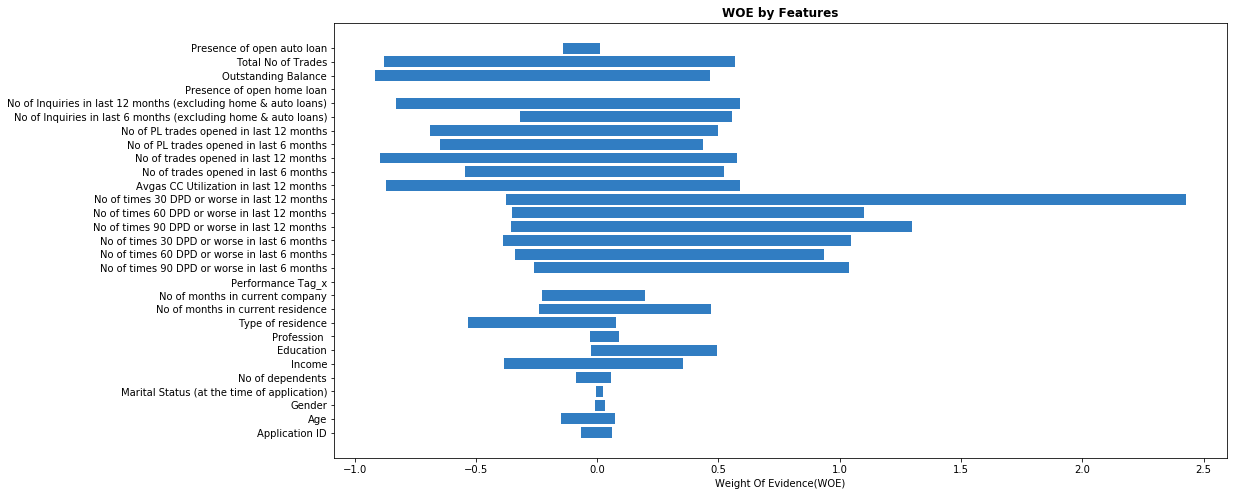

In [69]:

# Plot IV
plt.figure(figsize=(16,8))
plt.barh(woe['Variable'], woe['WoE'], color = '#317DC2')
plt.xlabel('Weight Of Evidence(WOE)')
plt.title('WOE by Features', fontweight="bold");

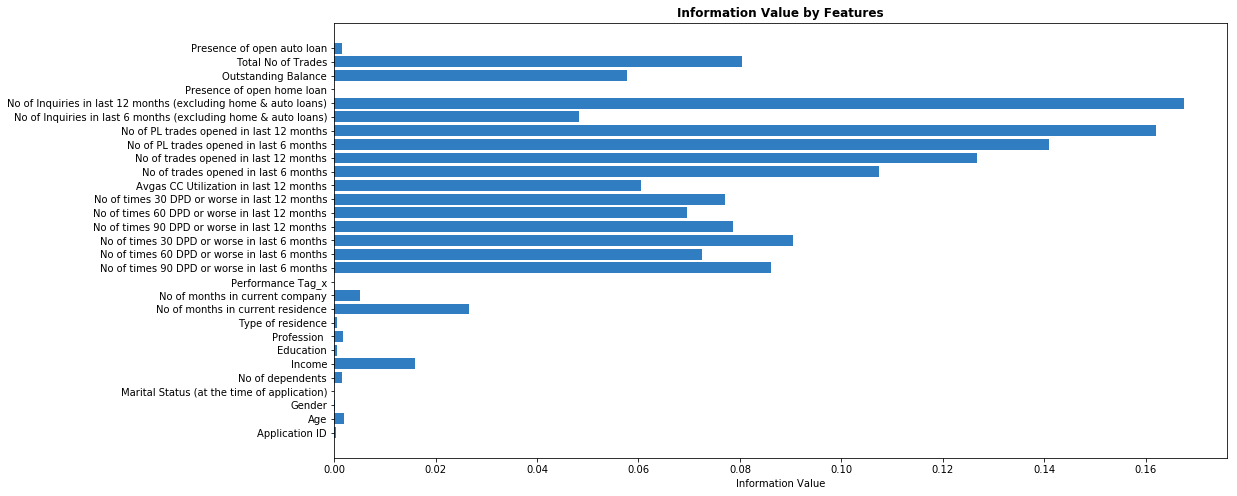

In [70]:

# Plot IV
plt.figure(figsize=(16,8))
plt.barh(woe['Variable'], woe['IV'], color = '#317DC2')
plt.xlabel('Information Value')
plt.title('Information Value by Features', fontweight="bold");

In [71]:
woe.loc[woe.Variable=='Outstanding Balance'][['Cutoff','WoE']]

,Cutoff,WoE
0,"(-0.001, 7044.4]",-0.757077
1,"(7044.4, 30043.8]",-0.917433
2,"(30043.8, 390940.2]",-0.114146
3,"(390940.2, 588203.2]",0.261231
4,"(588203.2, 774985.0]",0.464972
5,"(774985.0, 970683.0]",0.436689
6,"(970683.0, 1351212.6]",0.403573
7,"(1351212.6, 2959898.6]",-0.347461
8,"(2959898.6, 3275806.0]",-0.854603
9,"(3275806.0, 5218801.0]",0.293859


In [72]:
woe_age=woe.loc[woe.Variable=='Age']
woe_income=woe.loc[woe.Variable=='Income']
woe_curr_res=woe.loc[woe.Variable=='No of months in current residence']
woe_curr_comp=woe.loc[woe.Variable=='No of months in current company']
woe_90DPD6=woe.loc[woe.Variable=='No of times 90 DPD or worse in last 6 months']
woe_60DPD6=woe.loc[woe.Variable=='No of times 60 DPD or worse in last 6 months']
woe_30DPD6=woe.loc[woe.Variable=='No of times 30 DPD or worse in last 6 months']
woe_90DPD12=woe.loc[woe.Variable=='No of times 90 DPD or worse in last 12 months']
woe_60DPD12=woe.loc[woe.Variable=='No of times 60 DPD or worse in last 12 months']
woe_30DPD12=woe.loc[woe.Variable=='No of times 30 DPD or worse in last 12 months']
woe_avg_cc=woe.loc[woe.Variable=='Avgas CC Utilization in last 12 months']
woe_T6=woe.loc[woe.Variable=='No of trades opened in last 6 months']
woe_T12=woe.loc[woe.Variable=='No of trades opened in last 12 months']
woe_PL6=woe.loc[woe.Variable=='No of PL trades opened in last 6 months']
woe_PL12=woe.loc[woe.Variable=='No of PL trades opened in last 12 months']
woe_inq6=woe.loc[woe.Variable=='No of Inquiries in last 6 months (excluding home & auto loans)']
woe_inq12=woe.loc[woe.Variable=='No of Inquiries in last 12 months (excluding home & auto loans)']
woe_home_loan=woe.loc[woe.Variable=='Presence of open home loan']
woe_out_bal=woe.loc[woe.Variable=='Outstanding Balance']
woe_tot_trades=woe.loc[woe.Variable=='Total No of Trades']
woe_auto_loan=woe.loc[woe.Variable=='Presence of open auto loan']


In [73]:
def get_cut_off_age(a):
    for i in range(len(woe_age.Cutoff)):
        if(a in woe_age.Cutoff[i]):
            return woe_age.WoE[i]

In [74]:
woe_data['Age']=woe_data['Age'].apply(get_cut_off_age)
woe_data['Age']=woe_data['Age'].fillna(woe_age.WoE[0])

In [75]:
def get_cut_off_income(a):
    for i in range(len(woe_income.Cutoff)):
        if(a in woe_income.Cutoff[i]):
            return woe_income.WoE[i]

In [76]:
woe_data['Income']=woe_data['Income'].apply(get_cut_off_income)
woe_data['Income']=woe_data['Income'].fillna(woe_income.WoE[0])

In [77]:
def get_cut_off_curr_res(a):
    for i in range(len(woe_curr_res.Cutoff)):
        if(a in woe_curr_res.Cutoff[i]):
            return woe_curr_res.WoE[i]

In [78]:
woe_data['No of months in current residence']=woe_data['No of months in current residence'].apply(get_cut_off_curr_res)
woe_data['No of months in current residence']=woe_data['No of months in current residence'].fillna(woe_curr_res.WoE[0])

In [79]:
def get_cut_off_curr_comp(a):
    for i in range(len(woe_curr_comp.Cutoff)):
        if(a in woe_curr_comp.Cutoff[i]):
            return woe_curr_comp.WoE[i]

In [80]:
woe_data['No of months in current company']=woe_data['No of months in current company'].apply(get_cut_off_curr_comp)
woe_data['No of months in current company']=woe_data['No of months in current company'].fillna(woe_curr_comp.WoE[0])

def get_cut_off_90DPD6(a):
    for i in range(len(woe_90DPD6.Cutoff)):
        if(a in woe_90DPD6.Cutoff[i]):
            return woe_90DPD6.WoE[i]

woe_data['No of times 90 DPD or worse in last 6 months']=woe_data['No of times 90 DPD or worse in last 6 months'].apply(get_cut_off_90DPD6)
woe_data['No of times 90 DPD or worse in last 6 months']=woe_data['No of times 90 DPD or worse in last 6 months'].fillna(woe_90DPD6.WoE[0])

def get_cut_off_60DPD6(a):
    for i in range(len(woe_60DPD6.Cutoff)):
        if(a in woe_60DPD6.Cutoff[i]):
            return woe_60DPD6.WoE[i]

woe_data['No of times 60 DPD or worse in last 6 months']=woe_data['No of times 60 DPD or worse in last 6 months'].apply(get_cut_off_60DPD6)
woe_data['No of times 60 DPD or worse in last 6 months']=woe_data['No of times 60 DPD or worse in last 6 months'].fillna(woe_60DPD6.WoE[0])

def get_cut_off_30DPD6(a):
    for i in range(len(woe_30DPD6.Cutoff)):
        if(a in woe_30DPD6.Cutoff[i]):
            return woe_30DPD6.WoE[i]

woe_data['No of times 30 DPD or worse in last 6 months']=woe_data['No of times 30 DPD or worse in last 6 months'].apply(get_cut_off_30DPD6)
woe_data['No of times 30 DPD or worse in last 6 months']=woe_data['No of times 30 DPD or worse in last 6 months'].fillna(woe_30DPD6.WoE[0])

def get_cut_off_90DPD12(a):
    for i in range(len(woe_90DPD12.Cutoff)):
        if(a in woe_90DPD12.Cutoff[i]):
            return woe_90DPD12.WoE[i]

woe_data['No of times 90 DPD or worse in last 12 months']=woe_data['No of times 90 DPD or worse in last 12 months'].apply(get_cut_off_90DPD12)
woe_data['No of times 90 DPD or worse in last 12 months']=woe_data['No of times 90 DPD or worse in last 12 months'].fillna(woe_90DPD12.WoE[0])

def get_cut_off_60DPD12(a):
    for i in range(len(woe_60DPD12.Cutoff)):
        if(a in woe_60DPD12.Cutoff[i]):
            return woe_60DPD12.WoE[i]

woe_data['No of times 60 DPD or worse in last 12 months']=woe_data['No of times 60 DPD or worse in last 12 months'].apply(get_cut_off_60DPD12)
woe_data['No of times 60 DPD or worse in last 12 months']=woe_data['No of times 60 DPD or worse in last 12 months'].fillna(woe_60DPD12.WoE[0])

def get_cut_off_30DPD12(a):
    for i in range(len(woe_30DPD12.Cutoff)):
        if(a in woe_30DPD12.Cutoff[i]):
            return woe_30DPD12.WoE[i]

woe_data['No of times 30 DPD or worse in last 12 months']=woe_data['No of times 30 DPD or worse in last 12 months'].apply(get_cut_off_30DPD12)
woe_data['No of times 30 DPD or worse in last 12 months']=woe_data['No of times 30 DPD or worse in last 12 months'].fillna(woe_30DPD12.WoE[0])

In [81]:
def get_cut_off_avg_cc(a):
    for i in range(len(woe_avg_cc.Cutoff)):
        if(a in woe_avg_cc.Cutoff[i]):
            return woe_avg_cc.WoE[i]

In [82]:
woe_data['Avgas CC Utilization in last 12 months']	=woe_data['Avgas CC Utilization in last 12 months'].apply(get_cut_off_avg_cc)
woe_data['Avgas CC Utilization in last 12 months']	=woe_data['Avgas CC Utilization in last 12 months'].fillna(woe_avg_cc.WoE[0])

In [83]:
def get_cut_off_T6(a):
    for i in range(len(woe_T6.Cutoff)):
        if(a in woe_T6.Cutoff[i]):
            return woe_T6.WoE[i]

In [84]:
woe_data['No of trades opened in last 6 months']	=woe_data['No of trades opened in last 6 months'].apply(get_cut_off_T6)
woe_data['No of trades opened in last 6 months']	=woe_data['No of trades opened in last 6 months'].fillna(woe_T6.WoE[0])

In [85]:
def get_cut_off_T12(a):
    for i in range(len(woe_T12.Cutoff)):
        if(a in woe_T12.Cutoff[i]):
            return woe_T12.WoE[i]

In [86]:
woe_data['No of trades opened in last 12 months']	=woe_data['No of trades opened in last 12 months']	.apply(get_cut_off_T12)
woe_data['No of trades opened in last 12 months']	=woe_data['No of trades opened in last 12 months'].fillna(woe_T12.WoE[0])

def get_cut_off_PL6(a):
    for i in range(len(woe_PL6.Cutoff)):
        if(a in woe_PL6.Cutoff[i]):
            return woe_PL6.WoE[i]

woe_data['No of PL trades opened in last 6 months']	=woe_data['No of PL trades opened in last 6 months'].apply(get_cut_off_PL6)
woe_data['No of PL trades opened in last 6 months']	=woe_data['No of PL trades opened in last 6 months'].fillna(woe_PL6.WoE[0])

In [87]:
def get_cut_off_PL12(a):
    for i in range(len(woe_PL12.Cutoff)):
        if(a in woe_PL12.Cutoff[i]):
            return woe_PL12.WoE[i]

In [88]:
woe_data['No of PL trades opened in last 12 months']	=woe_data['No of PL trades opened in last 12 months'].apply(get_cut_off_PL12)
woe_data['No of PL trades opened in last 12 months']	=woe_data['No of PL trades opened in last 12 months'].fillna(woe_PL12.WoE[0])

In [89]:
def get_cut_off_inq6(a):
    for i in range(len(woe_inq6.Cutoff)):
        if(a in woe_inq6.Cutoff[i]):
            return woe_inq6.WoE[i]

In [90]:
woe_data['No of Inquiries in last 6 months (excluding home & auto loans)']=woe_data['No of Inquiries in last 6 months (excluding home & auto loans)'].apply(get_cut_off_inq6)
woe_data['No of Inquiries in last 6 months (excluding home & auto loans)']=woe_data['No of Inquiries in last 6 months (excluding home & auto loans)'].fillna(woe_inq6.WoE[0])

In [91]:
def get_cut_off_inq12(a):
    for i in range(len(woe_inq12.Cutoff)):
        if(a in woe_inq12.Cutoff[i]):
            return woe_inq12.WoE[i]

In [92]:
woe_data['No of Inquiries in last 12 months (excluding home & auto loans)']=woe_data['No of Inquiries in last 12 months (excluding home & auto loans)'].apply(get_cut_off_inq12)
woe_data['No of Inquiries in last 12 months (excluding home & auto loans)']=woe_data['No of Inquiries in last 12 months (excluding home & auto loans)'].fillna(woe_inq12.WoE[0])

In [93]:
def get_cut_off_home_loan(a):
    for i in range(len(woe_home_loan.Cutoff)):
        if(a in woe_home_loan.Cutoff[i]):
            return woe_home_loan.WoE[i]

In [94]:
woe_data['Presence of open home loan']=woe_data['Presence of open home loan'].apply(get_cut_off_home_loan)
woe_data['Presence of open home loan']=woe_data['Presence of open home loan'].fillna(woe_home_loan.WoE[0])

In [95]:
def get_cut_off_out_bal(a):
    for i in range(len(woe_out_bal.Cutoff)):
        if(a in woe_out_bal.Cutoff[i]):
            return woe_out_bal.WoE[i]

In [96]:
woe_data['Outstanding Balance']	=woe_data['Outstanding Balance'].apply(get_cut_off_out_bal)
woe_data['Outstanding Balance']	=woe_data['Outstanding Balance'].fillna(woe_out_bal.WoE[0])

In [97]:
def get_cut_off_tot_trades(a):
    for i in range(len(woe_tot_trades.Cutoff)):
        if(a in woe_tot_trades.Cutoff[i]):
            return woe_tot_trades.WoE[i]

In [98]:
woe_data['Total No of Trades']	=woe_data['Total No of Trades']	.apply(get_cut_off_tot_trades)
woe_data['Total No of Trades']	=woe_data['Total No of Trades'].fillna(woe_tot_trades.WoE[0])

def get_cut_off_auto_loan(a):
    for i in range(len(woe_auto_loan.Cutoff)):
        if(a in woe_auto_loan.Cutoff[i]):
            return woe_auto_loan.WoE[i]

woe_data['Presence of open auto loan']	=woe_data['Presence of open auto loan']	.apply(get_cut_off_auto_loan)
woe_data['Presence of open auto loan']	=woe_data['Presence of open auto loan'].fillna(woe_auto_loan.WoE[0])

woe_data['Age']=woe_data['Age'].apply(get_cut_off_row)
woe_data['Income']=woe_data['Income'].apply(get_cut_off_row)

woe_data['No of months in current residence']=woe_data['No of months in current residence'].apply(get_cut_off_row)
woe_data['No of months in current company']	=woe_data['No of months in current company'].apply(get_cut_off_row)

woe_data['No of times 90 DPD or worse in last 6 months']	=woe_data['No of times 90 DPD or worse in last 6 months']	.apply(get_cut_off_row)
woe_data['No of times 60 DPD or worse in last 6 months']	=woe_data['No of times 60 DPD or worse in last 6 months']	.apply(get_cut_off_row)
woe_data['No of times 30 DPD or worse in last 6 months']	=woe_data['No of times 30 DPD or worse in last 6 months']	.apply(get_cut_off_row)
woe_data['No of times 90 DPD or worse in last 12 months']	=woe_data['No of times 90 DPD or worse in last 12 months']	.apply(get_cut_off_row)
woe_data['No of times 60 DPD or worse in last 12 months']	=woe_data['No of times 60 DPD or worse in last 12 months']	.apply(get_cut_off_row)
woe_data['No of times 30 DPD or worse in last 12 months']	=woe_data['No of times 30 DPD or worse in last 12 months']	.apply(get_cut_off_row)
woe_data['Avgas CC Utilization in last 12 months']	=woe_data['Avgas CC Utilization in last 12 months']	.apply(get_cut_off_row)
woe_data['No of trades opened in last 6 months']	=woe_data['No of trades opened in last 6 months']	.apply(get_cut_off_row)
woe_data['No of trades opened in last 12 months']	=woe_data['No of trades opened in last 12 months']	.apply(get_cut_off_row)
woe_data['No of PL trades opened in last 6 months']	=woe_data['No of PL trades opened in last 6 months']	.apply(get_cut_off_row)
woe_data['No of PL trades opened in last 12 months']	=woe_data['No of PL trades opened in last 12 months']	.apply(get_cut_off_row)
woe_data['No of Inquiries in last 6 months (excluding home & auto loans)']	=woe_data['No of Inquiries in last 6 months (excluding home & auto loans)']	.apply(get_cut_off_row)
woe_data['No of Inquiries in last 12 months (excluding home & auto loans)']	=woe_data['No of Inquiries in last 12 months (excluding home & auto loans)']	.apply(get_cut_off_row)
woe_data['Presence of open home loan']	=woe_data['Presence of open home loan']	.apply(get_cut_off_row)
woe_data['Outstanding Balance']	=woe_data['Outstanding Balance'].apply(get_cut_off_row)
woe_data['Total No of Trades']	=woe_data['Total No of Trades']	.apply(get_cut_off_row)
woe_data['Presence of open auto loan']	=woe_data['Presence of open auto loan']	.apply(get_cut_off_row)



In [99]:
woe_data.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,0.032311,F,Married,2.0,-0.273438,Bachelor,SAL,Rented,-0.066470,-0.225877,0.0,0,0,0,0,0,0,-0.870970,-0.54395,-0.817152,0,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.448426,0,0.0
1,432830445,-0.013932,M,Married,4.0,-0.386069,Professional,SE_PROF,Rented,-0.066470,-0.180946,0.0,0,0,0,0,0,0,-0.870970,-0.54395,-0.817152,0,-0.687206,-0.319027,-0.828899,0.0,-0.757077,-0.049374,0,0.0
2,941387308,0.031094,M,Single,2.0,-0.169920,Bachelor,SE_PROF,Rented,-0.066470,-0.207493,0.0,0,0,0,0,0,0,-0.777299,-0.54395,-0.894590,0,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.878451,0,0.0
3,392161677,-0.045219,M,Married,1.0,-0.386069,Bachelor,SE,Rented,0.125239,-0.207493,0.0,0,0,0,0,0,0,-0.608152,-0.54395,-0.894590,0,-0.687206,-0.319027,-0.828899,0.0,0.293859,-0.448426,1,0.0
4,182011211,0.031094,F,Married,5.0,-0.169920,Professional,SAL,Rented,-0.066470,-0.180946,0.0,0,0,0,0,0,0,-0.608152,-0.54395,-0.894590,0,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.448426,0,0.0


In [100]:
woe_data['Gender']=woe_data['Gender'].map({'F':0.031571, 'M':-0.009952})
woe_data['Marital Status (at the time of application)']=woe_data['Marital Status (at the time of application)'].map({'Married':-0.003957, 'Single':0.022562})
woe_data['No of dependents']=woe_data['No of dependents'].map({1: 0.039467, 2: -0.085909, 3: 0.054975, 4: -0.026258, 5: 0.005670})
woe_data['Education']=woe_data['Education'].map({'Bachelor':0.018034, 'Masters':0.007382,'Others':0.492055,'Phd':-0.024863,'Professional':-0.018712})
woe_data['Profession ']=woe_data['Profession '].map({'SAL':-0.028326,'SE':0.091989,'SE_PROF':-0.014066})
woe_data['Type of residence']=woe_data['Type of residence'].map({'Company provided': 0.078800,'Living with Parents': 0.066248,'Others': -0.531235,'Owned': 0.003455,'Rented':-0.004177})


woe_data['Age']	=woe_data['Age'].fillna(woe_age.WoE[0])
woe_data['Income']	=woe_data['Income'].fillna(woe_income.WoE[0])

woe_data['No of months in current residence']	=woe_data['No of months in current residence'].fillna(woe_curr_res.WoE[0])
woe_data['No of months in current company']	=woe_data['No of months in current company'].fillna(woe_curr_comp.WoE[0])
woe_data['No of times 90 DPD or worse in last 6 months']	=woe_data['No of times 90 DPD or worse in last 6 months'].fillna(woe_90DPD6.WoE[0])
woe_data['No of times 60 DPD or worse in last 6 months']	=woe_data['No of times 60 DPD or worse in last 6 months'].fillna(woe_60DPD6.WoE[0])
woe_data['No of times 30 DPD or worse in last 6 months']	=woe_data['No of times 30 DPD or worse in last 6 months'].fillna(woe_30DPD6.WoE[0])
woe_data['No of times 90 DPD or worse in last 12 months']	=woe_data['No of times 90 DPD or worse in last 12 months'].fillna(woe_90DPD12.WoE[0])
woe_data['No of times 60 DPD or worse in last 12 months']	=woe_data['No of times 60 DPD or worse in last 12 months'].fillna(woe_60DPD12.WoE[0])
woe_data['No of times 30 DPD or worse in last 12 months']	=woe_data['No of times 30 DPD or worse in last 12 months'].fillna(woe_30DPD12.WoE[0])
woe_data['Avgas CC Utilization in last 12 months']	=woe_data['Avgas CC Utilization in last 12 months'].fillna(woe_avg_cc.WoE[0])
woe_data['No of trades opened in last 6 months']	=woe_data['No of trades opened in last 6 months'].fillna(woe_T6.WoE[0])
woe_data['No of trades opened in last 12 months']	=woe_data['No of trades opened in last 12 months'].fillna(woe_T12.WoE[0])
woe_data['No of PL trades opened in last 6 months']	=woe_data['No of PL trades opened in last 6 months'].fillna(woe_PL6.WoE[0])
woe_data['No of PL trades opened in last 12 months']	=woe_data['No of PL trades opened in last 12 months'].fillna(woe_PL12.WoE[0])
woe_data['No of Inquiries in last 6 months (excluding home & auto loans)']	=woe_data['No of Inquiries in last 6 months (excluding home & auto loans)'].fillna(woe_inq6.WoE[0])
woe_data['No of Inquiries in last 12 months (excluding home & auto loans)']	=woe_data['No of Inquiries in last 12 months (excluding home & auto loans)'].fillna(woe_inq12.WoE[0])
woe_data['Presence of open home loan']	=woe_data['Presence of open home loan'].fillna(woe_home_loan.WoE[0])
woe_data['Outstanding Balance']	=woe_data['Outstanding Balance'].fillna(woe_out_bal.WoE[0])
woe_data['Total No of Trades']	=woe_data['Total No of Trades'].fillna(woe_tot_trades.WoE[0])
woe_data['Presence of open auto loan']	=woe_data['Presence of open auto loan'].fillna(woe_auto_loan.WoE[0])



woe_data['Education']	=woe_data['Education'].fillna(woe_edu.WoE[0])
woe_data['Profession ']	=woe_data['Profession '].fillna(woe_prof.WoE[0])
woe_data['Type of residence']	=woe_data['Type of residence'].fillna(woe_resType.WoE[0])
woe_data['Gender']	=woe_data['Gender'].fillna(woe_gender.WoE[0])
woe_data['Marital Status (at the time of application)']	=woe_data['Marital Status (at the time of application)'].fillna(woe_marital_status.WoE[0])



In [101]:
woe.loc[woe.Variable=='Presence of open auto loan'][['Cutoff','WoE']]

,Cutoff,WoE
0,0,0.012046
1,1,-0.139116


In [102]:
woe_data['No of times 90 DPD or worse in last 6 months']=woe_data['No of times 90 DPD or worse in last 6 months'].map({0: -0.261365, 1: 0.588211, 2: 0.809601, 3:1.037275})
woe_data['No of times 60 DPD or worse in last 6 months']=woe_data['No of times 60 DPD or worse in last 6 months'].map({0: -0.337020, 1:	0.543175, 2: 0.667459, 3:0.933204, 4:0.866804, 5:0.755013})
woe_data['No of times 30 DPD or worse in last 6 months']=woe_data['No of times 30 DPD or worse in last 6 months'].map({0: -0.387448, 1:	0.466955, 2: 0.666075, 3:0.765527, 4:0.951215, 5:1.045606, 6: 0.724241, 7: 0.483079})
woe_data['No of times 90 DPD or worse in last 12 months']=woe_data['No of times 90 DPD or worse in last 12 months'].map({0: -0.357329, 1:	0.508250, 2:	0.673068, 3:	0.884979, 4:	0.957173, 5:	1.297587})
woe_data['No of times 60 DPD or worse in last 12 months']=woe_data['No of times 60 DPD or worse in last 12 months'].map({0: -0.352585, 1:	0.213580, 2:	0.615599, 3:	0.752166, 4:	0.883958, 5:	0.814011, 6:	1.102118, 7:	0.483079})

In [103]:
woe_data['No of times 30 DPD or worse in last 12 months']=woe_data['No of times 30 DPD or worse in last 12 months'].map({0: -0.377062, 1:	0.070469, 2:	0.595966, 3:	0.737087, 4:	0.807486, 5:	0.972205, 6:	0.936677, 7:	0.955683, 8:	0.770761, 9:	2.428989})
woe_data['No of PL trades opened in last 6 months']=woe_data['No of PL trades opened in last 6 months'].map({0: -0.649917, 1:	0.201445, 2:	0.437862, 3:	0.423042, 4:	0.352089, 5:	0.044440, 6: -0.461383})
woe_data['Presence of open auto loan']=woe_data['Presence of open auto loan'].map({0: 0.012046, 1: -0.139116})

In [104]:
woe_data.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,0.032311,0.031571,-0.003957,-0.085909,-0.273438,0.018034,-0.028326,-0.004177,-0.066470,-0.225877,0.0,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.870970,-0.54395,-0.817152,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.448426,0.012046,0.0
1,432830445,-0.013932,-0.009952,-0.003957,-0.026258,-0.386069,-0.018712,-0.014066,-0.004177,-0.066470,-0.180946,0.0,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.870970,-0.54395,-0.817152,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.757077,-0.049374,0.012046,0.0
2,941387308,0.031094,-0.009952,0.022562,-0.085909,-0.169920,0.018034,-0.014066,-0.004177,-0.066470,-0.207493,0.0,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.777299,-0.54395,-0.894590,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.878451,0.012046,0.0
3,392161677,-0.045219,-0.009952,-0.003957,0.039467,-0.386069,0.018034,0.091989,-0.004177,0.125239,-0.207493,0.0,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.608152,-0.54395,-0.894590,-0.649917,-0.687206,-0.319027,-0.828899,0.0,0.293859,-0.448426,-0.139116,0.0
4,182011211,0.031094,0.031571,-0.003957,0.005670,-0.169920,-0.018712,-0.028326,-0.004177,-0.066470,-0.180946,0.0,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.608152,-0.54395,-0.894590,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.448426,0.012046,0.0


In [105]:
woe_data.drop(['Application ID','Performance Tag_x'],axis=1,inplace=True)

In [106]:
rejected_list=woe_data[(woe_data['Performance Tag_y'].isnull())]

In [107]:
woe_data=woe_data[~(woe_data['Performance Tag_y'].isnull())]

woe_data=woe_data[~(woe_data['Gender'].isnull())]
woe_data=woe_data[~(woe_data['Education'].isnull())] 
woe_data=woe_data[~(woe_data['Profession '].isnull())] 
woe_data=woe_data[~(woe_data['Type of residence'].isnull())] 
woe_data=woe_data[~(woe_data['Marital Status (at the time of application)'].isnull())]
woe_data=woe_data[~(woe_data['No of dependents'].isnull())]

In [108]:
woe_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69727 entries, 0 to 71300
Data columns (total 28 columns):
Age                                                                69727 non-null float64
Gender                                                             69727 non-null float64
Marital Status (at the time of application)                        69727 non-null float64
No of dependents                                                   69727 non-null float64
Income                                                             69727 non-null float64
Education                                                          69727 non-null float64
Profession                                                         69727 non-null float64
Type of residence                                                  69727 non-null float64
No of months in current residence                                  69727 non-null float64
No of months in current company                                    69727 non-null

# Model-building

## Two types of models need to build
### 1: Demographic data model: 
    #Build a model to predict the likelihood of default using only the demographic data. 
### 2: Model using both demographic and credit bureau data: 
    #Build a model to predict default using both the data sets. 

In [109]:
#dgdata will store demographic data
dgdata=woe_data.iloc[:, :10]
dgdata["Performance_Tag"]=woe_data["Performance Tag_y"]

In [110]:
dgdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69727 entries, 0 to 71300
Data columns (total 11 columns):
Age                                            69727 non-null float64
Gender                                         69727 non-null float64
Marital Status (at the time of application)    69727 non-null float64
No of dependents                               69727 non-null float64
Income                                         69727 non-null float64
Education                                      69727 non-null float64
Profession                                     69727 non-null float64
Type of residence                              69727 non-null float64
No of months in current residence              69727 non-null float64
No of months in current company                69727 non-null float64
Performance_Tag                                69727 non-null float64
dtypes: float64(11)
memory usage: 6.4 MB


# Test-Train Split

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
# Putting feature variable to X
X = dgdata.drop(['Performance_Tag'], axis=1)
X.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company
0,0.032311,0.031571,-0.003957,-0.085909,-0.273438,0.018034,-0.028326,-0.004177,-0.066470,-0.225877
1,-0.013932,-0.009952,-0.003957,-0.026258,-0.386069,-0.018712,-0.014066,-0.004177,-0.066470,-0.180946
2,0.031094,-0.009952,0.022562,-0.085909,-0.169920,0.018034,-0.014066,-0.004177,-0.066470,-0.207493
3,-0.045219,-0.009952,-0.003957,0.039467,-0.386069,0.018034,0.091989,-0.004177,0.125239,-0.207493
4,0.031094,0.031571,-0.003957,0.005670,-0.169920,-0.018712,-0.028326,-0.004177,-0.066470,-0.180946


In [113]:
# Putting response variable to y
y = dgdata['Performance_Tag']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Performance_Tag, dtype: float64

In [114]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [115]:
### Checking the Performance_Tag Rate
performance_Tag = (sum(dgdata['Performance_Tag'])/len(dgdata['Performance_Tag'].index))*100
performance_Tag

4.222180790798399

# Looking at Correlation

In [116]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

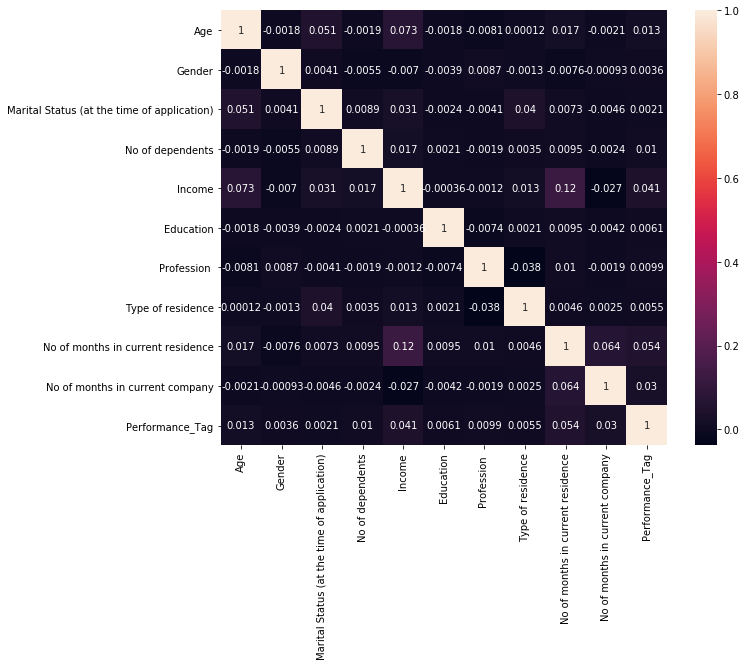

In [452]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,8))        # Size of the figure
sns.heatmap(dgdata.corr(),annot = True)
plt.show()

### Model1:

In [118]:
import statsmodels.api as sm

In [119]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48797
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8457.3
Date:                Mon, 16 Sep 2019   Deviance:                       16915.
Time:                        15:41:21   Pearson chi2:                 4.89e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -3.1141      0.023   -136.601      0.000      -3.159      -3.069
Age                                             0.9093      0.359      2.535      0.011       0.206       1.612
Gender                                          2.5076      1.246      2.012      0.044       0.065       4.950
Marital Status (at the time of application)    -0.3037      2.374     -0.128      0.898      -4.957       4.349
No of dependents                                0.8893      0.435      2.043      0.041       0.036       1.742
Income                                          0.9167      0.112      8.205      0.000       0.698       1.136
Education                                       0.9280      0.743      1.248      0.212      -0.529       2.385
Profession                                      0.7720      0.472      1.636      0.102      -0.153       1.697
Type of residence                               1.1744      0.821      1.431      0.152      -0.434       2.783
No of months in current residence               0.8100      0.086      9.395      0.000       0.641       0.979
No of months in current company                 1.0767      0.154      7.006      0.000       0.775       1.378
===============================================================================================================
"""

In [120]:
X_train.drop('Marital Status (at the time of application)',axis=1, inplace=True)

In [121]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48798
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8457.3
Date:                Mon, 16 Sep 2019   Deviance:                       16915.
Time:                        15:41:21   Pearson chi2:                 4.89e+04
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1141      0.023   -136.601      0.000      -3.159      -3.069
Age                                   0.9075      0.358      2.532      0.011       0.205       1.610
Gender                                2.5069      1.246      2.011      0.044       0.064       4.950
No of dependents                      0.8888      0.435      2.042      0.041       0.036       1.742
Income                                0.9163      0.112      8.204      0.000       0.697       1.135
Education                             0.9280      0.743      1.248      0.212      -0.529       2.385
Profession                            0.7723      0.472      1.637      0.102      -0.153       1.697
Type of residence                     1.1694      0.819      1.428      0.153      -0.436       2.774
No of months in current residence     0.8099      0.086      9.395      0.000       0.641       0.979
No of months in current company       1.0767      0.154      7.006      0.000       0.776       1.378
=====================================================================================================
"""

# Feature Selection Using RFE

In [122]:
#Execute by commenting next cell content
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [123]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 6)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [124]:
rfe.support_


array([ True,  True,  True,  True, False, False, False,  True,  True])

In [125]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('Gender', True, 1),
 ('No of dependents', True, 1),
 ('Income', True, 1),
 ('Education', False, 4),
 ('Profession ', False, 3),
 ('Type of residence', False, 2),
 ('No of months in current residence', True, 1),
 ('No of months in current company', True, 1)]

In [126]:
col = X_train.columns[rfe.support_]

In [127]:
X_train.columns[~rfe.support_]

Index(['Education', 'Profession ', 'Type of residence'], dtype='object')

In [128]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance_Tag   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48801
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8460.3
Date:                Mon, 16 Sep 2019   Deviance:                       16921.
Time:                        15:41:23   Pearson chi2:                 4.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -3.1143      0.023   -136.659      0.000      -3.159      -3.070
Age                                   0.8983      0.358      2.509      0.012       0.197       1.600
Gender                                2.5051      1.246      2.010      0.044       0.063       4.947
No of dependents                      0.8877      0.435      2.038      0.042       0.034       1.741
Income                                0.9181      0.112      8.222      0.000       0.699       1.137
No of months in current residence     0.8129      0.086      9.433      0.000       0.644       0.982
No of months in current company       1.0756      0.154      7.000      0.000       0.774       1.377
=====================================================================================================
"""

In [129]:
# Make a VIF dataframe for all the variables present
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Income,1.02
7,No of months in current residence,1.02
0,Age,1.01
8,No of months in current company,1.01
1,Gender,1.00
2,No of dependents,1.00
4,Education,1.00
5,Profession,1.00
6,Type of residence,1.00


## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [130]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

29333    0.028365
27963    0.024418
5479     0.040029
40722    0.073854
7255     0.037431
1499     0.030268
37658    0.043234
52376    0.060470
4845     0.053977
3896     0.034229
dtype: float64

In [131]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02836546, 0.02441768, 0.0400292 , 0.07385371, 0.03743062,
       0.03026772, 0.04323425, 0.06047026, 0.05397686, 0.03422898])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [132]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.028365
1,0.0,0.024418
2,0.0,0.040029
3,1.0,0.073854
4,0.0,0.037431


In [133]:
#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [134]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.28 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0.0,0.028365,0
1,0.0,0.024418,0
2,0.0,0.040029,0
3,1.0,0.073854,0
4,0.0,0.037431,0


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [135]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [136]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[46732     0]
 [ 2076     0]]


In [137]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9574659891821012


In [138]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Calculate the sensitivity

TP/(TP+FN)

0.0

In [140]:
# Calculate the specificity

TN/(TN+FP)

1.0

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [141]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [143]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

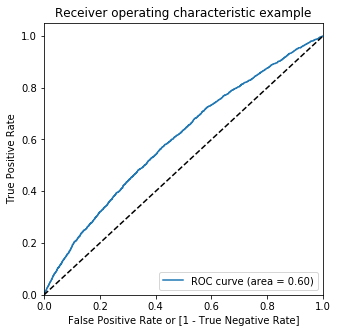

In [144]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [145]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.028365,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.024418,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.040029,0,1,0,0,0,0,0,0,0,0,0
3,1.0,0.073854,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.037431,0,1,0,0,0,0,0,0,0,0,0


In [146]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042534  1.000000  0.000000
0.1   0.1  0.956134  0.003372  0.998459
0.2   0.2  0.957466  0.000000  1.000000
0.3   0.3  0.957466  0.000000  1.000000
0.4   0.4  0.957466  0.000000  1.000000
0.5   0.5  0.957466  0.000000  1.000000
0.6   0.6  0.957466  0.000000  1.000000
0.7   0.7  0.957466  0.000000  1.000000
0.8   0.8  0.957466  0.000000  1.000000
0.9   0.9  0.957466  0.000000  1.000000


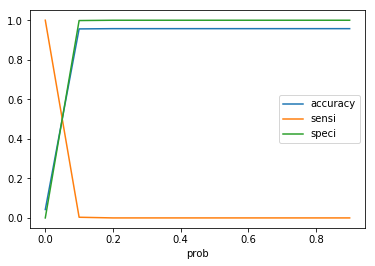

In [147]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.028365,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.024418,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.040029,0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,0.073854,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.037431,0,1,0,0,0,0,0,0,0,0,0,0


## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [149]:
X_test_sm = sm.add_constant(X_test[col])

In [150]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

5978     0.054013
4154     0.038474
30414    0.058143
55433    0.076031
14794    0.062326
14213    0.035708
5811     0.032375
36083    0.023694
8095     0.030942
36873    0.032402
dtype: float64

In [151]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head

y_pred_1.head()

,0
5978,0.054013
4154,0.038474
30414,0.058143
55433,0.076031
14794,0.062326


In [152]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [153]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [154]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Check 'y_pred_final'

y_pred_final.head()

,Performance_Tag,0
0,0.0,0.054013
1,0.0,0.038474
2,0.0,0.058143
3,0.0,0.076031
4,0.0,0.062326


In [155]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [156]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Performance_Tag,Conversion_Prob
0,0.0,0.054013
1,0.0,0.038474
2,0.0,0.058143
3,0.0,0.076031
4,0.0,0.062326


In [157]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [158]:
# Check y_pred_final

y_pred_final.head()

,Performance_Tag,Conversion_Prob,final_predicted
0,0.0,0.054013,0
1,0.0,0.038474,0
2,0.0,0.058143,0
3,0.0,0.076031,0
4,0.0,0.062326,0


In [159]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Performance_Tag'], y_pred_final.final_predicted)

0.9585066207753716

In [160]:
confusion2 = metrics.confusion_matrix(y_pred_final['Performance_Tag'], y_pred_final.final_predicted )
confusion2

array([[20051,     0],
       [  868,     0]], dtype=int64)

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Calculate sensitivity
TP / float(TP+FN)

0.0

In [163]:
# Calculate specificity
TN / float(TN+FP)

1.0

### Though the accuracy is high, we are not getting the resonable to specificity and recall, Let's consider both demographic data and credit buarea data

In [164]:
woe_data.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,0.032311,0.031571,-0.003957,-0.085909,-0.273438,0.018034,-0.028326,-0.004177,-0.066470,-0.225877,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.870970,-0.54395,-0.817152,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.448426,0.012046,0.0
1,-0.013932,-0.009952,-0.003957,-0.026258,-0.386069,-0.018712,-0.014066,-0.004177,-0.066470,-0.180946,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.870970,-0.54395,-0.817152,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.757077,-0.049374,0.012046,0.0
2,0.031094,-0.009952,0.022562,-0.085909,-0.169920,0.018034,-0.014066,-0.004177,-0.066470,-0.207493,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.777299,-0.54395,-0.894590,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.878451,0.012046,0.0
3,-0.045219,-0.009952,-0.003957,0.039467,-0.386069,0.018034,0.091989,-0.004177,0.125239,-0.207493,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.608152,-0.54395,-0.894590,-0.649917,-0.687206,-0.319027,-0.828899,0.0,0.293859,-0.448426,-0.139116,0.0
4,0.031094,0.031571,-0.003957,0.005670,-0.169920,-0.018712,-0.028326,-0.004177,-0.066470,-0.180946,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.608152,-0.54395,-0.894590,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.448426,0.012046,0.0


In [165]:
### Checking the Performance_Tag Rate
performance_Tag = (sum(woe_data['Performance Tag_y'])/len(woe_data['Performance Tag_y'].index))*100
performance_Tag

4.222180790798399

We have almost 4.2% Performance_Tag rate
## Looking at Correlation

In [166]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

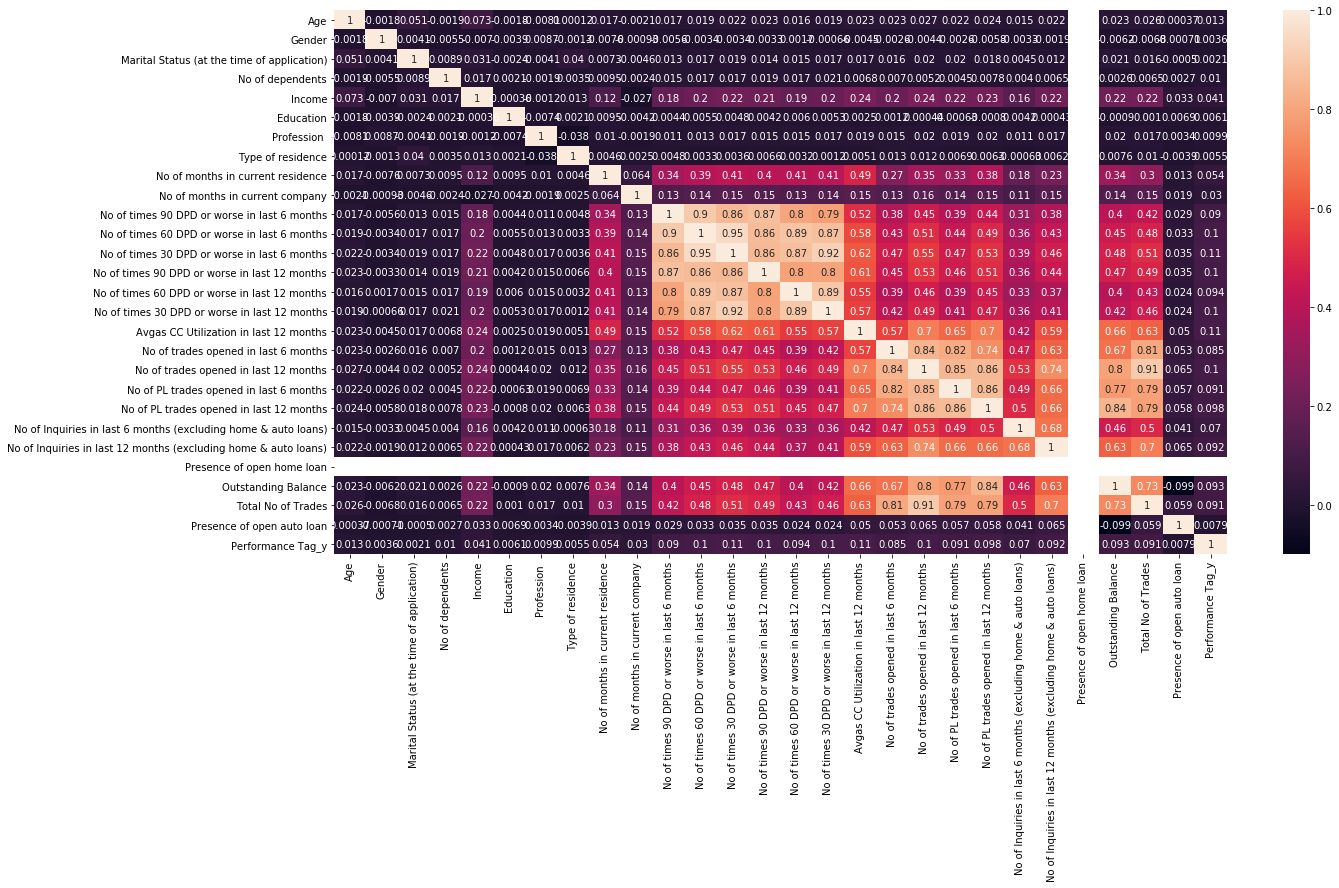

In [167]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(woe_data.corr(),annot = True)
plt.show()

## Logistic regression
Let's perform the logistic regression model on the combined data 

### Model 1:

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
# Putting feature variable to X
X = woe_data.drop(['Performance Tag_y'], axis=1)
X.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,0.032311,0.031571,-0.003957,-0.085909,-0.273438,0.018034,-0.028326,-0.004177,-0.066470,-0.225877,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.870970,-0.54395,-0.817152,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.448426,0.012046
1,-0.013932,-0.009952,-0.003957,-0.026258,-0.386069,-0.018712,-0.014066,-0.004177,-0.066470,-0.180946,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.870970,-0.54395,-0.817152,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.757077,-0.049374,0.012046
2,0.031094,-0.009952,0.022562,-0.085909,-0.169920,0.018034,-0.014066,-0.004177,-0.066470,-0.207493,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.777299,-0.54395,-0.894590,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.878451,0.012046
3,-0.045219,-0.009952,-0.003957,0.039467,-0.386069,0.018034,0.091989,-0.004177,0.125239,-0.207493,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.608152,-0.54395,-0.894590,-0.649917,-0.687206,-0.319027,-0.828899,0.0,0.293859,-0.448426,-0.139116
4,0.031094,0.031571,-0.003957,0.005670,-0.169920,-0.018712,-0.028326,-0.004177,-0.066470,-0.180946,-0.261365,-0.33702,-0.387448,-0.357329,-0.352585,-0.377062,-0.608152,-0.54395,-0.894590,-0.649917,-0.687206,-0.319027,-0.828899,0.0,-0.854603,-0.448426,0.012046


In [170]:
# Putting response variable to y
y = woe_data['Performance Tag_y']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Performance Tag_y, dtype: float64

In [171]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [172]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_y   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48781
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8175.0
Date:                Mon, 16 Sep 2019   Deviance:                       16350.
Time:                        15:41:31   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1149      0.024   -131.056      0.000      -3.161      -3.068
Age                                                                 0.8397      0.360      2.332      0.020       0.134       1.545
Gender                                                              2.3309      1.254      1.858      0.063      -0.128       4.790
Marital Status (at the time of application)                        -1.0083      2.389     -0.422      0.673      -5.690       3.673
No of dependents                                                    0.8602      0.437      1.970      0.049       0.004       1.716
Income                                                              0.2584      0.116      2.225      0.026       0.031       0.486
Education                                                           0.9216      0.749      1.231      0.218      -0.546       2.389
Profession                                                          0.5644      0.475      1.188      0.235      -0.367       1.495
Type of residence                                                   1.1190      0.814      1.375      0.169      -0.476       2.714
No of months in current residence                                  -0.2242      0.099     -2.260      0.024      -0.419      -0.030
No of months in current company                                     0.4126      0.157      2.625      0.009       0.104       0.721
No of times 90 DPD or worse in last 6 months                       -0.0568      0.125     -0.455      0.649      -0.301       0.188
No of times 60 DPD or worse in last 6 months                       -0.0471      0.172     -0.273      0.785      -0.385       0.290
No of times 30 DPD or worse in last 6 months                        0.3408      0.169      2.022      0.043       0.010       0.671
No of times 90 DPD or worse in last 12 months                       0.0113      0.104      0.108      0.914      -0.193       0.215
No of times 60 DPD or worse in last 12 months                      -0.0635      0.132     -0.480      0.632      -0.323       0.196
No of times 30 DPD or worse in last 12 months                       0.1556      0.135      1.154      0.248      -0.109       0.420
Avgas CC Utilization in last 12 months                              0.4031      0.065      6.209      0.000       0.276       0.530
No of trades opened in last 6 months                               -0.0914      0.100     -0.918      0.359      -0.287       0.104
No of trades opened in last 12 months                               0.3318      0.133      2.486      0.013       0.070       0.593
No of PL trades opened in last 6 months                             0.0349      0.103      0.339      0.735      -0.167       

### Feature selection using RFE

In [173]:
#Execute by commenting next cell content
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [174]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)

In [175]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('Gender', True, 1),
 ('Marital Status (at the time of application)', False, 4),
 ('No of dependents', True, 1),
 ('Income', True, 1),
 ('Education', True, 1),
 ('Profession ', True, 1),
 ('Type of residence', True, 1),
 ('No of months in current residence', True, 1),
 ('No of months in current company', True, 1),
 ('No of times 90 DPD or worse in last 6 months', False, 7),
 ('No of times 60 DPD or worse in last 6 months', False, 9),
 ('No of times 30 DPD or worse in last 6 months', True, 1),
 ('No of times 90 DPD or worse in last 12 months', False, 11),
 ('No of times 60 DPD or worse in last 12 months', False, 5),
 ('No of times 30 DPD or worse in last 12 months', False, 3),
 ('Avgas CC Utilization in last 12 months', True, 1),
 ('No of trades opened in last 6 months', False, 6),
 ('No of trades opened in last 12 months', True, 1),
 ('No of PL trades opened in last 6 months', False, 10),
 ('No of PL trades opened in last 12 months', False, 8),
 ('No of Inquiries in

In [176]:
col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [177]:
X_train.columns[~rfe.support_]

Index(['Marital Status (at the time of application)',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'No of trades opened in last 6 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'Presence of open home loan', 'Total No of Trades'],
      dtype='object')

In [178]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [179]:
# Assessing the model with StatsModels
# Import statsmodels

import statsmodels.api as sm

In [180]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_y   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48792
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8177.5
Date:                Mon, 16 Sep 2019   Deviance:                       16355.
Time:                        15:41:40   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1153      0.024   -131.125      0.000      -3.162      -3.069
Age                                                                 0.8337      0.360      2.317      0.021       0.128       1.539
Gender                                                              2.3449      1.254      1.870      0.062      -0.113       4.803
No of dependents                                                    0.8678      0.437      1.988      0.047       0.012       1.723
Income                                                              0.2606      0.116      2.245      0.025       0.033       0.488
Education                                                           0.9156      0.750      1.221      0.222      -0.554       2.385
Profession                                                          0.5694      0.475      1.199      0.230      -0.361       1.500
Type of residence                                                   1.0856      0.811      1.339      0.181      -0.503       2.675
No of months in current residence                                  -0.2137      0.099     -2.161      0.031      -0.407      -0.020
No of months in current company                                     0.4155      0.157      2.645      0.008       0.108       0.723
No of times 30 DPD or worse in last 6 months                        0.3443      0.057      6.066      0.000       0.233       0.456
Avgas CC Utilization in last 12 months                              0.4172      0.064      6.545      0.000       0.292       0.542
No of trades opened in last 12 months                               0.2045      0.084      2.426      0.015       0.039       0.370
No of Inquiries in last 12 months (excluding home & auto loans)     0.3499      0.069      5.053      0.000       0.214       0.486
Outstanding Balance                                                 0.1639      0.081      2.027      0.043       0.005       0.322
Presence of open auto loan                                          0.3558      0.582      0.612      0.541      -0.784       1.496
===================================================================================================================================
"""

In [181]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,No of trades opened in last 12 months,4.47
13,Outstanding Balance,3.31
10,Avgas CC Utilization in last 12 months,2.91
12,No of Inquiries in last 12 months (excluding h...,2.44
9,No of times 30 DPD or worse in last 6 months,1.85
7,No of months in current residence,1.39
3,Income,1.10
14,Presence of open auto loan,1.08
8,No of months in current company,1.05
0,Age,1.01


VIFs seem to be in a decent range except for three variables. 

Let's first drop the variable `Presence of open auto loan` since it has a high p-value as well as a high VIF.

In [182]:
X_train.drop('Presence of open auto loan', axis = 1, inplace = True)

In [183]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_y   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48793
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8177.7
Date:                Mon, 16 Sep 2019   Deviance:                       16355.
Time:                        15:41:42   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1153      0.024   -131.131      0.000      -3.162      -3.069
Age                                                                 0.8318      0.360      2.311      0.021       0.126       1.537
Gender                                                              2.3403      1.254      1.866      0.062      -0.118       4.798
No of dependents                                                    0.8671      0.437      1.986      0.047       0.011       1.723
Income                                                              0.2617      0.116      2.255      0.024       0.034       0.489
Education                                                           0.9194      0.750      1.226      0.220      -0.550       2.389
Profession                                                          0.5715      0.475      1.203      0.229      -0.359       1.502
Type of residence                                                   1.0860      0.811      1.340      0.180      -0.503       2.675
No of months in current residence                                  -0.2139      0.099     -2.164      0.030      -0.408      -0.020
No of months in current company                                     0.4159      0.157      2.647      0.008       0.108       0.724
No of times 30 DPD or worse in last 6 months                        0.3439      0.057      6.059      0.000       0.233       0.455
Avgas CC Utilization in last 12 months                              0.4185      0.064      6.568      0.000       0.294       0.543
No of trades opened in last 12 months                               0.2094      0.084      2.498      0.012       0.045       0.374
No of Inquiries in last 12 months (excluding home & auto loans)     0.3513      0.069      5.075      0.000       0.216       0.487
Outstanding Balance                                                 0.1568      0.080      1.964      0.049       0.000       0.313
===================================================================================================================================
"""

In [184]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,No of trades opened in last 12 months,4.36
13,Outstanding Balance,3.09
10,Avgas CC Utilization in last 12 months,2.90
12,No of Inquiries in last 12 months (excluding h...,2.43
9,No of times 30 DPD or worse in last 6 months,1.85
7,No of months in current residence,1.39
3,Income,1.10
8,No of months in current company,1.05
0,Age,1.01
1,Gender,1.00


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Profession `.

In [185]:
X_train.drop('Profession ', axis = 1, inplace = True)

In [186]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_y   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48794
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8178.4
Date:                Mon, 16 Sep 2019   Deviance:                       16357.
Time:                        15:41:43   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1155      0.024   -131.146      0.000      -3.162      -3.069
Age                                                                 0.8295      0.360      2.305      0.021       0.124       1.535
Gender                                                              2.3514      1.254      1.875      0.061      -0.106       4.809
No of dependents                                                    0.8636      0.437      1.979      0.048       0.008       1.719
Income                                                              0.2609      0.116      2.248      0.025       0.033       0.488
Education                                                           0.9104      0.750      1.214      0.225      -0.559       2.380
Type of residence                                                   1.0383      0.804      1.291      0.197      -0.538       2.614
No of months in current residence                                  -0.2138      0.099     -2.163      0.031      -0.408      -0.020
No of months in current company                                     0.4148      0.157      2.641      0.008       0.107       0.723
No of times 30 DPD or worse in last 6 months                        0.3446      0.057      6.071      0.000       0.233       0.456
Avgas CC Utilization in last 12 months                              0.4186      0.064      6.569      0.000       0.294       0.544
No of trades opened in last 12 months                               0.2096      0.084      2.500      0.012       0.045       0.374
No of Inquiries in last 12 months (excluding home & auto loans)     0.3513      0.069      5.075      0.000       0.216       0.487
Outstanding Balance                                                 0.1571      0.080      1.967      0.049       0.001       0.314
===================================================================================================================================
"""

In [187]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,No of trades opened in last 12 months,4.36
12,Outstanding Balance,3.09
9,Avgas CC Utilization in last 12 months,2.90
11,No of Inquiries in last 12 months (excluding h...,2.43
8,No of times 30 DPD or worse in last 6 months,1.85
6,No of months in current residence,1.39
3,Income,1.10
7,No of months in current company,1.05
0,Age,1.01
1,Gender,1.00


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Education`.

In [188]:
X_train.drop('Education', axis = 1, inplace = True)

In [189]:
# Refit the model with the new set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_y   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48795
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8179.1
Date:                Mon, 16 Sep 2019   Deviance:                       16358.
Time:                        15:41:44   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1155      0.024   -131.156      0.000      -3.162      -3.069
Age                                                                 0.8267      0.360      2.298      0.022       0.122       1.532
Gender                                                              2.3431      1.254      1.869      0.062      -0.115       4.801
No of dependents                                                    0.8617      0.437      1.974      0.048       0.006       1.717
Income                                                              0.2601      0.116      2.242      0.025       0.033       0.488
Type of residence                                                   1.0442      0.805      1.298      0.194      -0.533       2.621
No of months in current residence                                  -0.2127      0.099     -2.152      0.031      -0.406      -0.019
No of months in current company                                     0.4131      0.157      2.630      0.009       0.105       0.721
No of times 30 DPD or worse in last 6 months                        0.3450      0.057      6.079      0.000       0.234       0.456
Avgas CC Utilization in last 12 months                              0.4185      0.064      6.567      0.000       0.294       0.543
No of trades opened in last 12 months                               0.2095      0.084      2.499      0.012       0.045       0.374
No of Inquiries in last 12 months (excluding home & auto loans)     0.3514      0.069      5.077      0.000       0.216       0.487
Outstanding Balance                                                 0.1567      0.080      1.962      0.050       0.000       0.313
===================================================================================================================================
"""

In [190]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,No of trades opened in last 12 months,4.36
11,Outstanding Balance,3.09
8,Avgas CC Utilization in last 12 months,2.90
10,No of Inquiries in last 12 months (excluding h...,2.43
7,No of times 30 DPD or worse in last 6 months,1.85
5,No of months in current residence,1.39
3,Income,1.10
6,No of months in current company,1.05
0,Age,1.01
1,Gender,1.00


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Type of residence`.

In [191]:
X_train.drop('Type of residence', axis = 1, inplace = True)

In [192]:
# Refit the model with the new set of features

logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_y   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48796
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8180.1
Date:                Mon, 16 Sep 2019   Deviance:                       16360.
Time:                        15:41:45   Pearson chi2:                 4.84e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1154      0.024   -131.175      0.000      -3.162      -3.069
Age                                                                 0.8224      0.359      2.288      0.022       0.118       1.527
Gender                                                              2.3375      1.254      1.864      0.062      -0.120       4.795
No of dependents                                                    0.8659      0.437      1.983      0.047       0.010       1.722
Income                                                              0.2624      0.116      2.261      0.024       0.035       0.490
No of months in current residence                                  -0.2124      0.099     -2.149      0.032      -0.406      -0.019
No of months in current company                                     0.4150      0.157      2.642      0.008       0.107       0.723
No of times 30 DPD or worse in last 6 months                        0.3447      0.057      6.075      0.000       0.233       0.456
Avgas CC Utilization in last 12 months                              0.4184      0.064      6.566      0.000       0.294       0.543
No of trades opened in last 12 months                               0.2112      0.084      2.518      0.012       0.047       0.375
No of Inquiries in last 12 months (excluding home & auto loans)     0.3510      0.069      5.071      0.000       0.215       0.487
Outstanding Balance                                                 0.1557      0.080      1.950      0.051      -0.001       0.312
===================================================================================================================================
"""

In [193]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,No of trades opened in last 12 months,4.36
10,Outstanding Balance,3.09
7,Avgas CC Utilization in last 12 months,2.90
9,No of Inquiries in last 12 months (excluding h...,2.43
6,No of times 30 DPD or worse in last 6 months,1.85
4,No of months in current residence,1.39
3,Income,1.10
5,No of months in current company,1.05
0,Age,1.01
1,Gender,1.00


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `Gender`.

In [194]:
X_train.drop('Gender', axis = 1, inplace = True)

In [195]:
# Refit the model with the new set of features

logm7 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_y   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48797
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8181.8
Date:                Mon, 16 Sep 2019   Deviance:                       16364.
Time:                        15:41:46   Pearson chi2:                 4.83e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1149      0.024   -131.210      0.000      -3.161      -3.068
Age                                                                 0.8223      0.359      2.288      0.022       0.118       1.527
No of dependents                                                    0.8628      0.437      1.976      0.048       0.007       1.719
Income                                                              0.2609      0.116      2.249      0.025       0.033       0.488
No of months in current residence                                  -0.2140      0.099     -2.165      0.030      -0.408      -0.020
No of months in current company                                     0.4153      0.157      2.644      0.008       0.107       0.723
No of times 30 DPD or worse in last 6 months                        0.3452      0.057      6.082      0.000       0.234       0.456
Avgas CC Utilization in last 12 months                              0.4186      0.064      6.567      0.000       0.294       0.543
No of trades opened in last 12 months                               0.2115      0.084      2.524      0.012       0.047       0.376
No of Inquiries in last 12 months (excluding home & auto loans)     0.3516      0.069      5.080      0.000       0.216       0.487
Outstanding Balance                                                 0.1549      0.080      1.939      0.052      -0.002       0.311
===================================================================================================================================
"""

In [196]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,No of trades opened in last 12 months,4.36
9,Outstanding Balance,3.09
6,Avgas CC Utilization in last 12 months,2.90
8,No of Inquiries in last 12 months (excluding h...,2.43
5,No of times 30 DPD or worse in last 6 months,1.85
3,No of months in current residence,1.39
2,Income,1.10
4,No of months in current company,1.05
0,Age,1.01
1,No of dependents,1.00


In [197]:
X_train.drop('Outstanding Balance', axis = 1, inplace = True)

In [198]:
# Refit the model with the new set of features

logm8 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_y   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48798
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8183.7
Date:                Mon, 16 Sep 2019   Deviance:                       16367.
Time:                        15:41:47   Pearson chi2:                 4.83e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1147      0.024   -131.273      0.000      -3.161      -3.068
Age                                                                 0.8221      0.359      2.287      0.022       0.118       1.526
No of dependents                                                    0.8601      0.437      1.969      0.049       0.004       1.716
Income                                                              0.2629      0.116      2.266      0.023       0.036       0.490
No of months in current residence                                  -0.2073      0.099     -2.097      0.036      -0.401      -0.014
No of months in current company                                     0.4175      0.157      2.658      0.008       0.110       0.725
No of times 30 DPD or worse in last 6 months                        0.3429      0.057      6.034      0.000       0.232       0.454
Avgas CC Utilization in last 12 months                              0.4413      0.063      7.016      0.000       0.318       0.565
No of trades opened in last 12 months                               0.3008      0.070      4.268      0.000       0.163       0.439
No of Inquiries in last 12 months (excluding home & auto loans)     0.3597      0.069      5.203      0.000       0.224       0.495
===================================================================================================================================
"""

In [199]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,No of trades opened in last 12 months,3.17
6,Avgas CC Utilization in last 12 months,2.80
8,No of Inquiries in last 12 months (excluding h...,2.42
5,No of times 30 DPD or worse in last 6 months,1.85
3,No of months in current residence,1.39
2,Income,1.10
4,No of months in current company,1.05
0,Age,1.01
1,No of dependents,1.00


All the variables are within the range of p-values(<0.05) and vif are less than 5, we are good to go

### Step 3: Model Evaluation

In [200]:
X_train_sm.head()

,const,Age,Gender,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 30 DPD or worse in last 6 months,Avgas CC Utilization in last 12 months,No of trades opened in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),Outstanding Balance,Presence of open auto loan
29333,1.0,0.031094,-0.009952,0.005670,-0.273438,-0.018712,-0.028326,-0.004177,-0.241839,0.018708,-0.387448,-0.777299,-0.817152,0.168046,-0.347461,0.012046
27963,1.0,-0.073858,-0.009952,0.054975,-0.386069,-0.018712,-0.028326,0.078800,-0.241839,0.018708,-0.387448,-0.870970,-0.817152,0.168046,-0.757077,0.012046
5479,1.0,-0.073858,-0.009952,0.039467,-0.147387,-0.018712,-0.028326,0.003455,0.133444,0.018708,-0.387448,-0.727303,-0.894590,-0.828899,-0.757077,0.012046
40722,1.0,0.072700,-0.009952,-0.085909,0.352045,-0.018712,-0.014066,-0.004177,0.125239,0.182452,-0.387448,0.517423,0.002579,-0.828899,0.261231,0.012046
7255,1.0,-0.149821,-0.009952,0.005670,-0.147387,0.018034,-0.014066,-0.004177,-0.066470,0.196214,-0.387448,-0.870970,-0.817152,-0.828899,-0.917433,0.012046


In [201]:
X_train.head()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,No of times 30 DPD or worse in last 6 months,Avgas CC Utilization in last 12 months,No of trades opened in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans)
29333,0.031094,0.005670,-0.273438,-0.241839,0.018708,-0.387448,-0.777299,-0.817152,0.168046
27963,-0.073858,0.054975,-0.386069,-0.241839,0.018708,-0.387448,-0.870970,-0.817152,0.168046
5479,-0.073858,0.039467,-0.147387,0.133444,0.018708,-0.387448,-0.727303,-0.894590,-0.828899
40722,0.072700,-0.085909,0.352045,0.125239,0.182452,-0.387448,0.517423,0.002579,-0.828899
7255,-0.149821,0.005670,-0.147387,-0.066470,0.196214,-0.387448,-0.870970,-0.817152,-0.828899


In [202]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

29333    0.022400
27963    0.020508
5479     0.013597
40722    0.039111
7255     0.013423
1499     0.011227
37658    0.035017
52376    0.055675
4845     0.018406
3896     0.013159
dtype: float64

In [203]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02240039, 0.02050818, 0.01359733, 0.03911134, 0.01342297,
       0.01122685, 0.03501729, 0.05567548, 0.01840581, 0.01315897])

In [204]:
#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [205]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.022400
1,0.0,0.020508
2,0.0,0.013597
3,1.0,0.039111
4,0.0,0.013423


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.05 else 0

In [206]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.09 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0.0,0.022400,0
1,0.0,0.020508,0
2,0.0,0.013597,0
3,1.0,0.039111,0
4,0.0,0.013423,0


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [207]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [208]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[44141  2591]
 [ 1789   287]]


In [209]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.91026061301426


In [210]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [211]:
# Calculate the sensitivity

TP/(TP+FN)

0.1382466281310212

In [212]:
# Calculate the specificity

TN/(TN+FP)

0.9445561927587093

In [213]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [214]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [215]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

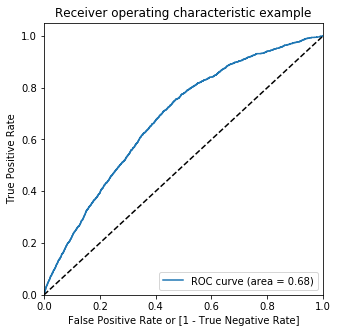

In [216]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [217]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.022400,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.020508,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.013597,0,1,0,0,0,0,0,0,0,0,0
3,1.0,0.039111,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.013423,0,1,0,0,0,0,0,0,0,0,0


In [218]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.042534  1.000000  0.000000
0.1   0.1  0.941669  0.057803  0.980934
0.2   0.2  0.957466  0.000000  1.000000
0.3   0.3  0.957466  0.000000  1.000000
0.4   0.4  0.957466  0.000000  1.000000
0.5   0.5  0.957466  0.000000  1.000000
0.6   0.6  0.957466  0.000000  1.000000
0.7   0.7  0.957466  0.000000  1.000000
0.8   0.8  0.957466  0.000000  1.000000
0.9   0.9  0.957466  0.000000  1.000000


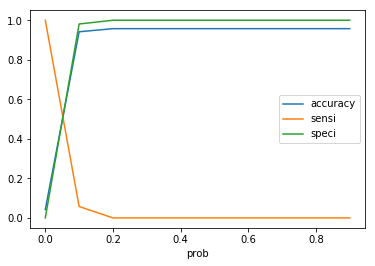

In [219]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Logistic Regression by PCA

In [220]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#### Principal Component Analysis

In [221]:
# Putting feature variable to X
X = woe_data.drop(['Performance Tag_y'], axis=1)
X.head()
# Putting response variable to y
y = woe_data['Performance Tag_y']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Performance Tag_y, dtype: float64

In [222]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [223]:
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [224]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      62.68
1      77.46
2      81.70
3      85.48
4      88.03
5      89.68
6      91.13
7      92.35
8      93.56
9      94.69
10     95.80
11     96.59
12     97.26
13     97.89
14     98.51
15     99.09
16     99.47
17     99.63
18     99.75
19     99.83
20     99.89
21     99.94
22     99.97
23     99.99
24    100.00
25    100.00
26    100.00
dtype: float64


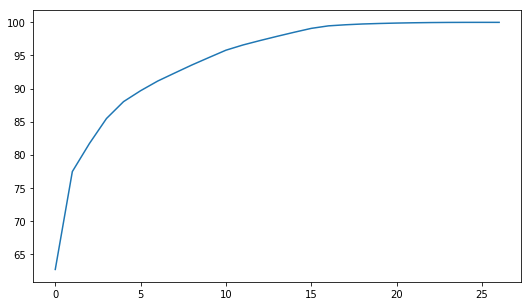

In [225]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [226]:
# create pipeline
PCA_VARS = 15
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [227]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.5863997705294214

In [228]:
X_train.shape

(48808, 27)

In [229]:
X_test.shape

(20919, 27)

In [230]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
#sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
#print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[11597  8454]
 [  294   574]]
AUC:    	 0.66


In [231]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [232]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6612903225806451

In [233]:
# Let us calculate specificity
TN / float(TN+FP)

0.5783751433843699

In [234]:
# class imbalance
y_train.value_counts()/y_train.shape

0.0    0.957466
1.0    0.042534
Name: Performance Tag_y, dtype: float64

In [235]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [10,11,12,13,14,15], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [236]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=Tr...
                                                           multi_class='warn',
                    

In [237]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.6755078182828121
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 15}


In [238]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
#sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
#print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[11607  8444]
 [  297   571]]
0.6578341013824884
0.5788738716273503
AUC:    	 0.66


In [239]:
y_prob = model.predict_proba(X_test)
print(y_prob.shape)
y_prob[:,1]
y_test.head()

(20919, 2)


5978     0.0
4154     0.0
30414    0.0
55433    0.0
14794    0.0
Name: Performance Tag_y, dtype: float64

In [240]:
probabilities = pd.DataFrame()
probabilities['prob'] = y_prob[:,1]
probabilities['actual'] = np.array(y_test)
probabilities['pred'] = np.array(y_pred)
probabilities.head()

,prob,actual,pred
0,0.270065,0.0,0.0
1,0.230682,0.0,0.0
2,0.549719,0.0,1.0
3,0.704717,0.0,1.0
4,0.293899,0.0,0.0


In [241]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.58      0.73     20051
         1.0       0.06      0.66      0.12       868

    accuracy                           0.58     20919
   macro avg       0.52      0.62      0.42     20919
weighted avg       0.94      0.58      0.70     20919



In [242]:
print(confusion_matrix(y_test,y_pred))

[[11607  8444]
 [  297   571]]


In [243]:
probabilities = pd.DataFrame()
probabilities['pred_prob'] = y_prob[:,1]
probabilities['actual'] = np.array(y_test)
probabilities['predicted'] = np.array(y_pred)
probabilities.head()

,pred_prob,actual,predicted
0,0.270065,0.0,0.0
1,0.230682,0.0,0.0
2,0.549719,0.0,1.0
3,0.704717,0.0,1.0
4,0.293899,0.0,0.0


In [244]:
decile_df = probabilities

In [245]:
decile_df['decile'] = pd.qcut(decile_df['pred_prob'], 10, labels=np.arange(10, 0, -1))
lift_df = decile_df.groupby('decile')['pred_prob'].count().reset_index()
lift_df.rename({'pred_prob':'total'}, axis=1, inplace=True)
lift_df_pred = decile_df[decile_df['actual']==1].groupby('decile')['actual'].count().reset_index()
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


In [246]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)
lift_df_final['cumresp'] = lift_df_final['actual'].cumsum()
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual']))
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))
lift_df_final

,decile,total,actual,cumresp,gain,cumlift
9,1,2092,176,176,20.276498,2.027650
8,2,2092,161,337,38.824885,1.941244
7,3,2092,127,464,53.456221,1.781874
6,4,2092,87,551,63.479263,1.586982
5,5,2091,77,628,72.350230,1.447005
4,6,2092,82,710,81.797235,1.363287
3,7,2092,59,769,88.594470,1.265635
2,8,2092,26,795,91.589862,1.144873
1,9,2092,36,831,95.737327,1.063748
0,10,2092,37,868,100.000000,1.000000


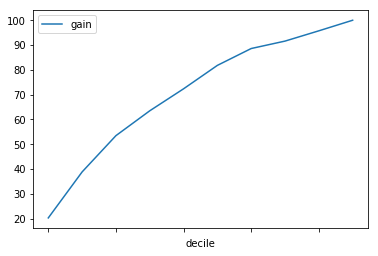

In [247]:
lift_df_final.plot.line(x='decile', y=['gain'])

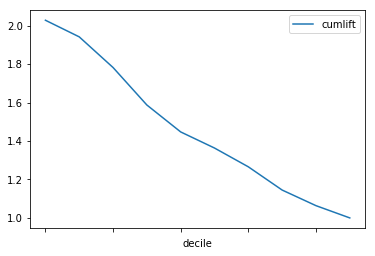

In [248]:
lift_df_final.plot.line(x='decile', y=['cumlift'])

### sensitivity=67%
### specificity=57%
### accuracy=67%

## Model Evaluation

In [249]:
# Assuming the rejected list is going to be defaulted and let's see the predictions
rejected_list['Performance Tag_y'] = 0
rejected_list.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
69609,0.031094,-0.009952,0.022562,0.039467,0.352045,0.018034,-0.028326,-0.004177,0.470890,0.196214,-0.261365,-0.337020,0.666075,0.508250,0.615599,0.737087,0.517423,0.523688,0.402867,0.423042,0.100378,0.215276,0.247532,0.0,0.403573,0.375382,0.012046,0
69610,0.032311,0.031571,-0.003957,-0.026258,0.091018,0.007382,0.091989,-0.004177,-0.066470,0.000350,0.588211,0.543175,0.466955,0.884979,0.615599,0.595966,0.059101,0.434308,0.574930,0.423042,0.499094,0.554067,0.587388,0.0,0.436689,0.378451,0.012046,0
69611,0.032311,-0.009952,-0.003957,0.054975,0.138902,-0.018712,0.091989,-0.004177,-0.241839,-0.069021,1.037275,0.866804,1.045606,0.884979,0.814011,0.936677,0.362078,0.235315,0.574930,0.437862,0.499094,-0.319027,0.168046,0.0,0.464972,0.378451,0.012046,0
69612,0.049742,-0.009952,-0.003957,0.054975,0.080229,0.007382,-0.028326,-0.004177,-0.241839,-0.180946,0.588211,0.933204,0.951215,0.884979,0.883958,0.972205,0.362078,0.235315,0.574930,0.201445,0.499094,0.328295,0.587388,0.0,0.436689,0.378451,0.012046,0
69613,0.049742,0.031571,-0.003957,-0.026258,0.080229,-0.024863,-0.028326,-0.004177,-0.241839,-0.207493,0.809601,0.667459,0.951215,0.884979,0.615599,0.936677,0.573066,0.434308,0.574930,0.437862,0.415659,0.554067,0.509153,0.0,0.436689,0.378451,-0.139116,0


In [250]:
rejected_list=rejected_list.fillna(method='ffill')

In [251]:
df_eval = rejected_list.drop('Performance Tag_y',axis=1)
y_eval =rejected_list['Performance Tag_y']

In [252]:
df_eval.shape

(1425, 27)

In [253]:
# predict churn on test data
y_pred = model.predict(df_eval)

# create onfusion matrix
cm = confusion_matrix(y_eval, y_pred)
print(cm)

# check sensitivity and specificity
#sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
#print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))

# check area under curve
y_pred_prob = model.predict_proba(df_eval)[:, 1]
#print("AUC:    \t", round(roc_auc_score(y_eval, y_pred_prob),2))

[[   8 1417]
 [   0    0]]
nan
0.005614035087719298


### SMOTE Analysis

In [321]:

# Putting feature variable to X
X = woe_data.drop(['Performance Tag_y'], axis=1)
X.head()
# Putting response variable to y
y = woe_data['Performance Tag_y']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Performance Tag_y, dtype: float64

In [322]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(y_train.shape)

(48808, 27)
(48808,)


In [323]:
y_train.value_counts()

0.0    46732
1.0     2076
Name: Performance Tag_y, dtype: int64

In [324]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_log, y_train_log = sm.fit_sample(X_train, y_train.ravel())

In [325]:
print(X_train_log.shape)
print(y_train_log.shape)

(93464, 27)
(93464,)


In [326]:
unique, count = np.unique(y_train_log, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0.0: 46732, 1.0: 46732}

### Logistic Regression after over sampling

In [327]:

import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train_log,(sm.add_constant(X_train_log)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                93464
Model:                            GLM   Df Residuals:                    93437
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59593.
Date:                Mon, 16 Sep 2019   Deviance:                   1.1919e+05
Time:                        19:08:46   Pearson chi2:                 9.33e+04
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0095      0.007     -1.367      0.172      -0.023       0.004
x1             1.5292      0.118     12.970      0.000       1.298       1.760
x2             2.6208      0.425      6.166      0.000       1.788       3.454
x3            -0.6735      0.803     -0.839      0.402      -2.247       0.900
x4             1.1464      0.145      7.886      0.000       0.862       1.431
x5             0.2747      0.038      7.266      0.000       0.201       0.349
x6             0.6441      0.279      2.308      0.021       0.097       1.191
x7             0.2479      0.161      1.541      0.123      -0.067       0.563
x8             1.7520      0.274      6.400      0.000       1.215       2.289
x9            -0.2743      0.032     -8.473      0.000      -0.338      -0.211
x10            0.6775      0.051     13.374      0.000       0.578       0.777
x11           -0.0269      0.045     -0.602      0.547      -0.114       0.061
x12            0.0755      0.061      1.231      0.218      -0.045       0.196
x13            0.3897      0.060      6.497      0.000       0.272       0.507
x14           -0.0511      0.035     -1.477      0.140      -0.119       0.017
x15           -0.2618      0.044     -5.900      0.000      -0.349      -0.175
x16            0.1400      0.047      3.007      0.003       0.049       0.231
x17            0.4505      0.019     23.648      0.000       0.413       0.488
x18           -0.0329      0.032     -1.029      0.303      -0.096       0.030
x19            0.2410      0.041      5.874      0.000       0.161       0.321
x20            0.0110      0.033      0.337      0.736      -0.053       0.075
x21            0.0089      0.034      0.264      0.792      -0.057       0.075
x22           -0.0889      0.028     -3.209      0.001      -0.143      -0.035
x23            0.3689      0.023     16.093      0.000       0.324       0.414
x24         5.976e-16   5.09e-16      1.175      0.240      -4e-16    1.59e-15
x25            0.2667      0.029      9.221      0.000       0.210       0.323
x26           -0.1023      0.037     -2.772      0.006      -0.175      -0.030
x27            1.5056      0.193      7.782      0.000       1.126       1.885
==============================================================================
"""

In [328]:
#Execute by commenting next cell content
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 7 variables as output
rfe = rfe.fit(X_train, y_train)



In [329]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False])

In [330]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Marital Status (at the time of application)', 'Income',
       'No of months in current residence',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan'],
      dtype='object')

In [331]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [332]:
# Assessing the model with StatsModels
# Import statsmodels
import statsmodels.api as sm

In [333]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_y   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48797
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8193.8
Date:                Mon, 16 Sep 2019   Deviance:                       16388.
Time:                        19:08:57   Pearson chi2:                 4.82e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1123      0.024   -131.690      0.000      -3.159      -3.066
Age                                                                 0.8871      0.359      2.469      0.014       0.183       1.591
Gender                                                              2.3182      1.254      1.849      0.064      -0.139       4.775
No of dependents                                                    0.8585      0.437      1.965      0.049       0.002       1.715
Education                                                           0.8777      0.751      1.169      0.243      -0.594       2.350
Profession                                                          0.5730      0.475      1.207      0.227      -0.358       1.504
Type of residence                                                   1.1359      0.813      1.396      0.163      -0.458       2.730
No of months in current company                                     0.4119      0.157      2.630      0.009       0.105       0.719
No of times 30 DPD or worse in last 6 months                        0.3757      0.056      6.758      0.000       0.267       0.485
Avgas CC Utilization in last 12 months                              0.5109      0.057      9.018      0.000       0.400       0.622
No of Inquiries in last 12 months (excluding home & auto loans)     0.5109      0.062      8.233      0.000       0.389       0.633
===================================================================================================================================
"""

In [335]:
X_train.drop('Education',axis=1,inplace=True)

In [337]:
logm3 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      Performance Tag_y   No. Observations:                48808
Model:                            GLM   Df Residuals:                    48799
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31404.
Date:                Mon, 16 Sep 2019   Deviance:                       62807.
Time:                        19:11:49   Pearson chi2:                 4.85e+04
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Age                                                                 0.6923      0.146      4.733      0.000       0.406       0.979
Gender                                                              1.0942      0.539      2.030      0.042       0.037       2.151
No of dependents                                                    0.8045      0.182      4.411      0.000       0.447       1.162
Profession                                                          0.9299      0.204      4.560      0.000       0.530       1.330
Type of residence                                                   0.8729      0.295      2.963      0.003       0.296       1.450
No of months in current company                                     0.2828      0.065      4.369      0.000       0.156       0.410
No of times 30 DPD or worse in last 6 months                        0.4012      0.026     15.284      0.000       0.350       0.453
Avgas CC Utilization in last 12 months                              0.6112      0.022     27.416      0.000       0.568       0.655
No of Inquiries in last 12 months (excluding home & auto loans)     0.3243      0.022     14.691      0.000       0.281       0.368
===================================================================================================================================
"""

In [338]:
# Make a VIF dataframe for all the variables present
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
7,Avgas CC Utilization in last 12 months,2.13
6,No of times 30 DPD or worse in last 6 months,1.75
8,No of Inquiries in last 12 months (excluding h...,1.66
5,No of months in current company,1.04
0,Age,1.00
1,Gender,1.00
2,No of dependents,1.00
3,Profession,1.00
4,Type of residence,1.00


* All the p-values and VIF are within the limit

In [345]:
#y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred = res.predict(X_train)
y_train_pred[:10]

29333    0.357662
27963    0.353579
5479     0.285553
40722    0.474327
7255     0.263495
1499     0.256670
37658    0.369235
52376    0.581133
4845     0.326448
3896     0.266517
dtype: float64

In [346]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35766178, 0.35357857, 0.28555338, 0.4743265 , 0.26349522,
       0.25666991, 0.36923533, 0.58113262, 0.32644804, 0.26651674])

In [349]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0.0,0.357662,0
1,0.0,0.353579,0
2,0.0,0.285553,0
3,1.0,0.474327,0
4,0.0,0.263495,0


In [350]:
# Import metrics from sklearn for evaluation

from sklearn import metrics
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))


[[28277 18455]
 [  701  1375]]
0.6075233568267497


In [351]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Calculate the sensitivity

print('sensitivity: '+ str(TP/(TP+FN)))

# Calculate the specificity

print('specificity:' + str(TN/(TN+FP)))

sensitivity: 0.6623314065510597
specificity:0.6050885902593512


In [352]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
	

In [353]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

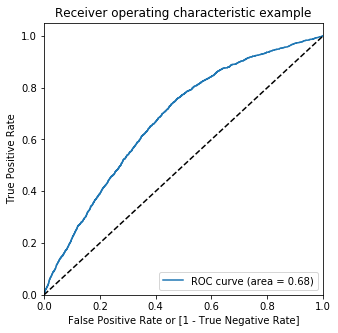

In [354]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)



In [355]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.357662,0,1,1,1,1,0,0,0,0,0,0
1,0.0,0.353579,0,1,1,1,1,0,0,0,0,0,0
2,0.0,0.285553,0,1,1,1,0,0,0,0,0,0,0
3,1.0,0.474327,0,1,1,1,1,1,0,0,0,0,0
4,0.0,0.263495,0,1,1,1,0,0,0,0,0,0,0


In [369]:

# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci=(cm1[1,1]/(cm1[1,1]+cm1[0,1]))
    recall = (cm1[1,1]/(cm1[1,0]+cm1[1,1]))
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci,recall]
    
print(cutoff_df)

     prob  accuracy     sensi     speci     preci    recall
0.0   0.0  0.042534  1.000000  0.000000  0.042534  1.000000
0.1   0.1  0.042534  1.000000  0.000000  0.042534  1.000000
0.2   0.2  0.042985  0.999518  0.000492  0.042534  0.999518
0.3   0.3  0.243567  0.931118  0.213023  0.049935  0.931118
0.4   0.4  0.482954  0.797206  0.468993  0.062524  0.797206
0.5   0.5  0.607523  0.662331  0.605089  0.069339  0.662331
0.6   0.6  0.751619  0.447977  0.765107  0.078105  0.447977
0.7   0.7  0.935461  0.072736  0.973787  0.109738  0.072736
0.8   0.8  0.957466  0.000000  1.000000       NaN  0.000000
0.9   0.9  0.957466  0.000000  1.000000       NaN  0.000000


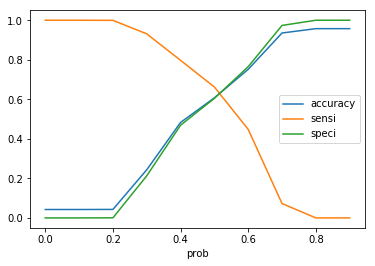

In [368]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

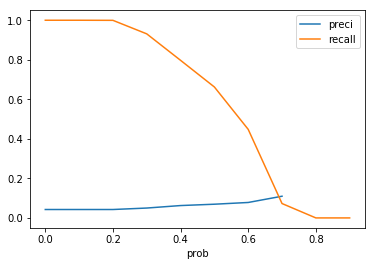

In [370]:
# Lets plot Precision and Recall 
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['preci','recall'])
plt.show()

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [376]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
col_test=X_train.columns
X_test = X_test[col_test]

y_test_pred = res.predict(X_test)
y_test_pred[:10]

5978     0.322208
4154     0.273103
30414    0.495100
55433    0.707738
14794    0.297180
14213    0.247102
5811     0.276971
36083    0.491209
8095     0.268523
36873    0.470039
dtype: float64

In [379]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head

y_pred_1.head()

,0
5978,0.322208
4154,0.273103
30414,0.495100
55433,0.707738
14794,0.297180


In [380]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [381]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Check 'y_pred_final'

y_pred_final.head()

,Performance Tag_y,0
0,0.0,0.322208
1,0.0,0.273103
2,0.0,0.495100
3,0.0,0.707738
4,0.0,0.297180


In [383]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob','Performance Tag_y':'Converted'})
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.322208
1,0.0,0.273103
2,0.0,0.495100
3,0.0,0.707738
4,0.0,0.297180


In [384]:
# Make predictions on the test set using 0.4 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0.0,0.322208,0
1,0.0,0.273103,0
2,0.0,0.495100,0
3,0.0,0.707738,1
4,0.0,0.297180,0


In [385]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.6032315120225632

In [386]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[12051,  8000],
       [  300,   568]], dtype=int64)

In [387]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


# Calculate the sensitivity

print('sensitivity: '+ str(TP/(TP+FN)))

# Calculate the specificity

print('specificity:' + str(TN/(TN+FP)))

sensitivity: 0.6623314065510597
specificity:0.6050885902593512


### Building Application Score Card

In [392]:
df_sc=  y_pred_final.copy()
df_sc.head()

,Converted,Conversion_Prob,final_predicted
0,0.0,0.322208,0
1,0.0,0.273103,0
2,0.0,0.495100,0
3,0.0,0.707738,1
4,0.0,0.297180,0


In [395]:
df_sc.columns = ['converted', 'predicted_prob_1','predicted']
df_sc['predicted_prob_0'] = 1-df_sc['predicted_prob_1']
df_sc.head()

,converted,predicted_prob_1,predicted,predicted_prob_0
0,0.0,0.322208,0,0.677792
1,0.0,0.273103,0,0.726897
2,0.0,0.495100,0,0.504900
3,0.0,0.707738,1,0.292262
4,0.0,0.297180,0,0.702820


In [396]:
defaulted_df = df_sc[df_sc['converted'] ==1]

In [398]:
defaulted_df.head()

,converted,predicted_prob_1,predicted,predicted_prob_0
17,1.0,0.406915,0,0.593085
26,1.0,0.678533,1,0.321467
38,1.0,0.595203,1,0.404797
53,1.0,0.455475,0,0.544525
62,1.0,0.493233,0,0.506767


In [404]:
scorecard = df_sc[df_sc['converted'] ==0]
scorecard.head()

,converted,predicted_prob_1,predicted,predicted_prob_0
0,0.0,0.322208,0,0.677792
1,0.0,0.273103,0,0.726897
2,0.0,0.495100,0,0.504900
3,0.0,0.707738,1,0.292262
4,0.0,0.297180,0,0.702820


In [405]:

scorecard['odds'] = scorecard['predicted_prob_1'] / (1 - scorecard['predicted_prob_1']  )
scorecard['logOdds'] = np.log(scorecard['odds'])
scorecard['score'] = 400 + (20 * (scorecard['logOdds']/ np.log(2)))

In [406]:
scorecard.head()

,converted,predicted_prob_1,predicted,predicted_prob_0,odds,logOdds,score
0,0.0,0.322208,0,0.677792,0.475378,-0.743644,378.542968
1,0.0,0.273103,0,0.726897,0.375710,-0.978938,371.753824
2,0.0,0.495100,0,0.504900,0.980591,-0.019600,399.434465
3,0.0,0.707738,1,0.292262,2.421583,0.884421,425.519010
4,0.0,0.297180,0,0.702820,0.422839,-0.860764,375.163588


In [407]:
scorecard['score'].min()

352.88204320145525

In [408]:
scorecard['score'].max()

432.1841323373121

In [410]:
scorecard['score'].mean()

394.16629827599075

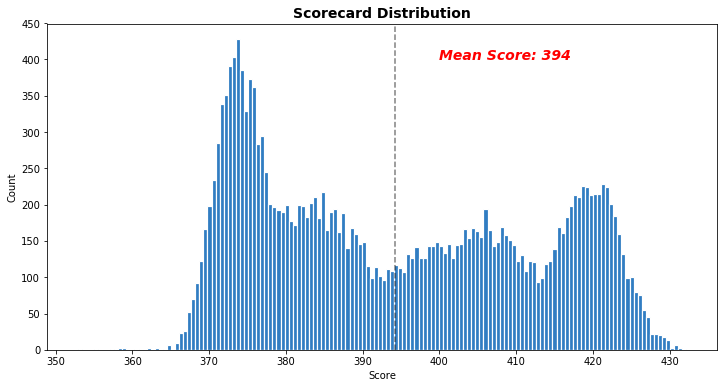

In [449]:

# Plot Distribution of Scores
plt.figure(figsize=(12,6))

plt.hist(scorecard['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(231,750)
plt.title('Scorecard Distribution', fontweight="bold", fontsize=14)
plt.axvline(scorecard['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.text(400, 400, 'Mean Score: 394', color='red', fontweight='bold', style='italic', fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count');

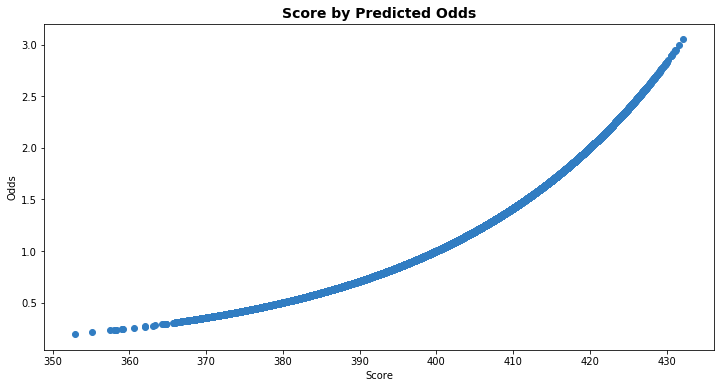

In [446]:
# Plot Scores Against Predicted Odds (Exponential Relationship)
plt.figure(figsize=(12,6))

plt.scatter(x='score',
            y='odds',
            data=scorecard,
            color='#317DC2')

plt.title('Score by Predicted Odds', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Odds');

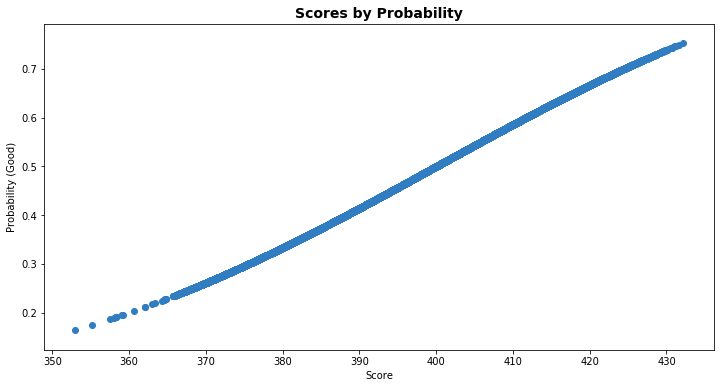

In [448]:
# Plot Scores Against Probabilities
plt.figure(figsize=(12,6))

plt.scatter(x='score',
            y='predicted_prob_1',
            data=scorecard,
            color='#317DC2')

plt.title('Scores by Probability', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Probability (Good)');

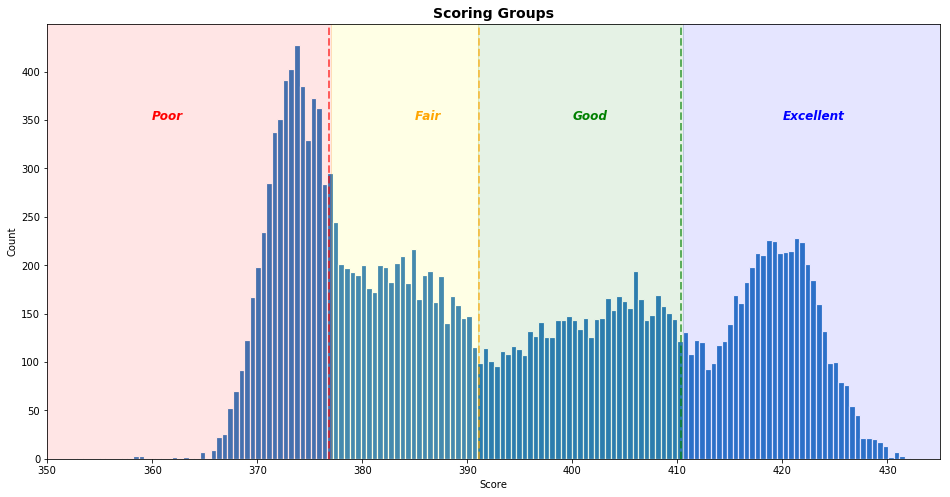

In [444]:
# Add Scoring Groups to Plot
plt.figure(figsize=(16,8))

plt.hist(scorecard['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

plt.xlim(350,435)
plt.title('Scoring Groups', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')

# Percentile Lines
plt.axvline(np.percentile(scorecard['score'],25), color='red', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(scorecard['score'],50), color='orange', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(scorecard['score'],75), color='green', linestyle='dashed', linewidth=2, alpha=0.6)

# Text
plt.text(360, 350, 'Poor', color='red', fontweight='bold', style='italic', fontsize=12)
plt.text(385, 350, 'Fair', color='orange', fontweight='bold', style='italic', fontsize=12)
plt.text(400, 350, 'Good', color='green', fontweight='bold', style='italic', fontsize=12)
plt.text(420, 350, 'Excellent', color='blue', fontweight='bold', style='italic', fontsize=12)

# Shading between Percentiles
plt.axvspan(350, 377, alpha=0.1, color='red')
plt.axvspan(377, 391, alpha=0.1, color='yellow')
plt.axvspan(391, 410.5, alpha=0.1, color='green')
plt.axvspan(410.5, 435, alpha=0.1, color='blue');